<style>
    header {
        display: flex;
        align-items: center;
        justify-content: center;
        padding: 0px;
    }

    .logo-container {
        flex:0.11
    }

    .logo-container img {
        max-height: 155px; /* Atur ukuran logo */
        width: auto;
    }

    .title-container {
        flex:0.89
    }

    h1 {
        margin: 0px 0px 0px 10px;
        font-size: 50px; /* Atur ukuran judul */
        font-family:Trebuchet MS; 
        font-weight:bold;
    }
    h2 {
        margin: 0px 0px 0px 10px;
        font-size: 30px; /* Atur ukuran judul */
        font-family:Trebuchet MS;
    }
</style>

<header>
    <div class="logo-container">
        <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" alt="Logo">
    </div>
    <div class="title-container">
        <h1>Tripleten Indonesia Project</h1>
        <h2>&mdash; Sprint 13 : Deret Waktu</h2>
    </div>
</header>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:45px; text-align:left; line-height:50px">
Studi Kasus <i>Time Series Forecasting</i> : Perancangan Model <i>Machine Learning</i> untuk Memprediksi Jumlah Pesanan Taksi Bandara dalam Satu Jam ke Depan.
</div>

&mdash; Melakukan perbandingan model regresi linear, random forest, gradient boosting dan SARIMAX dalam melakukan *time series forecasting*

**Table of contents**<a id='toc0_'></a>    
- [**A. Pendahuluan**](#toc1_)    
  - [1) Deskripsi Proyek](#toc1_1_)    
  - [2) Tujuan dan Alur Proses](#toc1_2_)    
- [**B. Memuat Data**](#toc2_)    
- [**C. Ikhtisar Data**](#toc3_)    
- [**D. Mempersiapkan Data**](#toc4_)    
  - [1) Eksplorasi Data](#toc4_1_)    
  - [2) Memperbaiki Data](#toc4_2_)    
  - [3) Pengayaan Data](#toc4_3_)    
  - [4) Kesimpulan](#toc4_4_)    
- [**E. Analisa Data Eksploratif (EDA)**](#toc5_)    
  - [1) Statistika Deskriptif dan Distribusi Data Jumlah Pesanan Taksi Setiap Jam](#toc5_1_)    
  - [2) Tren dan Musiman Pada Jumlah Pesanan Taksi](#toc5_2_)    
  - [3) Uji Stasioneritas dan Melakukan *Differencing* Data *Time Series*](#toc5_3_)    
  - [4) Analisa ACF dan PACF Pada *Time Series*](#toc5_4_)    
- [**F. Membangun Model *Machine-learning***](#toc6_)    
  - [1) *Features Engineering*](#toc6_1_)    
  - [2) *Model Optimization*](#toc6_2_)    
    - [**Ordinary Least Square (OLS) Regression**](#toc6_2_1_)    
      - [a. Skema 1 : Uji coba pada data stasioner, `orde_diff = 1`](#toc6_2_1_1_)    
      - [b. Skema 2 : Uji coba pada data non-stasioner, `orde_diff = 0`](#toc6_2_1_2_)    
    - [**Random Forest Regressor**](#toc6_2_2_)    
    - [**XGBoost Regressor**](#toc6_2_3_)    
    - [**Seasonal ARIMA with Exogenous Variables (SARIMAX)**](#toc6_2_4_)    
  - [3) *Model Testing*](#toc6_3_)    
    - [**Ordinary Least Square (OLS) Regression**](#toc6_3_1_)    
    - [**Random Forest Regressor**](#toc6_3_2_)    
    - [**XGBoost Regressor**](#toc6_3_3_)    
    - [**SARIMAX**](#toc6_3_4_)    
    - [**Kesimpulan**](#toc6_3_5_)    
- [**G. Kesimpulan**](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**A. Pendahuluan**](#toc0_)

## <a id='toc1_1_'></a>[1) Deskripsi Proyek](#toc0_)

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Menyiapkan sejumlah armada untuk memenuhi pesanan taksi bandara selama jam sibuk.</div>

<div style="margin-left:2%; width:95%; text-align:justify">

Sebuah perusahaan taksi bernama **Sweet Lift** ingin melakukan optimasi bisnis pada pesanan taksi bandara. **Sweet Lift** menginginkan agar pesanan taksi di bandara selama jam sibuk dapat dipenuhi oleh perusahaan sehingga menghasilkan keuntungan yang besar. Oleh karena itu, **Sweet Lift** menginginkan sebuah model yang dapat memprediksi jumlah pesanan taksi di bandara selama satu jam ke depan sehingga mereka dapat mempersiapkan armada yang dibutuhkan. **Sweet Lift** menargetkan agar rata-rata kesalahan prediksi model tidak lebih dari 48 jumlah pesanan. Model akan dibangun menggunakan data historis pesanan taksi bandara yang telah dikumpulkan oleh perusahaan.
</div>

## <a id='toc1_2_'></a>[2) Tujuan dan Alur Proses](#toc0_)

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang mampu memprediksi jumlah pesanan taksi di bandara untuk satu jam ke depan secara akurat. Adapun target capaian minimum yang harus dipenuhi dalam proyek ini adalah dapat menghasilkan model dengan skor RMSE (*root mean squared error*) tidak lebih dari 48 jumlah pesanan ketika memprediksi *testing dataset*.
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROYEK</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
2. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
3. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, *hyperparameter tuning* dan diakhiri dengan *model testing*.
</div>

</div>

# <a id='toc2_'></a>[**B. Memuat Data**](#toc0_)

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [1]:
# library for data processing
import pandas as pd, numpy as np, scipy.stats as st
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# library for data visualization
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patheffects as pe
from matplotlib.dates import HourLocator
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library for building models
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# other
import itertools
import time

In [2]:
# memuat dataset
try:
    raw_df = pd.read_csv("../dataset/taxi.csv", parse_dates=['datetime'], index_col='datetime')
    
except:
    raw_df = pd.read_csv("/datasets/taxi.csv", parse_dates=['datetime'], index_col='datetime')

# <a id='toc3_'></a>[**C. Ikhtisar Data**](#toc0_)

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [3]:
# display observations
print(f"Ukuran dataset                           : {raw_df.shape}")
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}")
print(f"Periode pengamatan                       : {raw_df.index.min()} s/d {raw_df.index.max()}\n")
print(raw_df.head(5), '\n')
print(raw_df.tail(5))

Ukuran dataset                           : (26496, 1)
Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('0 days 00:10:00')]
Periode pengamatan                       : 2018-03-01 00:00:00 s/d 2018-08-31 23:50:00

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32 

                     num_orders
datetime                       
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53


Data di atas merupakan data *time series* untuk historis jumlah pesanan taksi di bandara dengan frekuensi pengambilan data per 10 menit. Data tersebut mencakup pesanan taksi selama 01 Maret 2018 hingga 31 Agustus 2018 atau selama 6 bulan. Susunan data yang kita miliki saat ini sudah dalam urutan naik (berdasarkan *DatetimeIndex*) dan memiliki sebanyak 26496 observasi.

Metode pengambilan data dilakukan dengan metode *left closed* yang berarti jumlah pesanan taksi yang dicatat merupakan pesanan taksi untuk 10 menit ke depan. Contoh: Setiap pesanan taksi yang dilakukan pada menit ke-10 hingga sebelum menit ke-20, akan dicatat sebagai pesanan taksi pada menit ke-10.

# <a id='toc4_'></a>[**D. Mempersiapkan Data**](#toc0_)

## <a id='toc4_1_'></a>[1) Eksplorasi Data](#toc0_)

Berikut di bawah ini merupakan informasi umum dataset.

In [4]:
# general information of the dataset
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}\n")
raw_df.info()

Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('0 days 00:10:00')]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Dari hasil di atas, berikut informasi yang diperoleh.
* Dataset tidak mengandung *missing value*.
* Tidak terdapat kesalahan penggunaan tipe data.
* Tidak terdapat duplikat pada dataset karena telah menggunakan *DatetimeIndex*.
* Hanya terdapat 2 jenis informasi, yaitu jumlah pesanan taksi dan waktu observasi. Oleh karena itu perlu dilakukan penambahan fitur.
* Frekuensi pengamatan setiap observasi adalah per 10 menit sedangkan prediksi model akan dilakukan dengan frekuensi per jam. Oleh karena itu, perlu dilakukan *resampling* data.

## <a id='toc4_2_'></a>[2) Memperbaiki Data](#toc0_)

Perbaikan yang perlu dilakukan pada data adalah melakukan *resampling* agar frekuensi pengamatan yang semula per 10 menit berubah menjadi per jam. Proses *resampling* juga akan dilakukan dengan sistem *left closed*, mengikuti bagaimana data diperoleh.

In [5]:
# resampling the dataset
cln_df = raw_df.resample('1H').sum()
cln_df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


## <a id='toc4_3_'></a>[3) Pengayaan Data](#toc0_)

Dataset yang kita miliki saat ini hanya memiliki informasi jumlah pesanan taksi dan waktu pencatatan observasi. Oleh karena itu perlu dilakukan penambahan fitur untuk data input pada model *machine learning*. Adapun fitur yang akan ditambahkan, antara lain:
1. **Fitur berbasis waktu** : Fitur yang akan ditambahkan yakni `'hour'`, `'day'`, `'dayofweek'` dan `'month'`.
2. **Fitur *lag***.
3. **Fitur *rolling statistics*** : fitur yang akan ditambahkan yaitu *rolling mean* dan *rolling standard deviation* pada t-1.

Fitur-fitur di atas akan membantu model untuk mengidentifikasi *seasonality*, *trend*, dan fluktuasi pada data. Berikut di bawah ini  merupakan *function* yang berfungsi untuk menambahkan fitur pada dataset.

In [6]:
# the function to create features
def make_features(data:pd.DataFrame, lag:list[int]=None, window_size=None):
    # time-based features
    df = data.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    
    # lag features --> autoregressive features
    if lag: # will be executed if the variable has a value
        for i in lag:
            df[f"lag_{i}"] = df['num_orders'].shift(i)
    
    # rolling statistics features
    if window_size: # will be executed if the variable has a value
        rolling_window = df['num_orders'].rolling(window_size)
        df['rolling_mean (t-1)'] = rolling_window.mean().shift(1)
        df['rolling_std (t-1)'] = rolling_window.std().shift(1)
    
    return df.dropna()

Pada sesi ini, fitur tidak akan langsung ditambahkan tetapi akan dianalisa kesesuaian setiap parameter fitur secara iteratif pada tahap **Analisa Data Eksploratif (EDA)**.

## <a id='toc4_4_'></a>[4) Kesimpulan](#toc0_)

Berikut merupakan catatan penting yang diperoleh selama proses persiapan data dilakukan:
1. Data saat ini telah di-*resampling* sehingga memiliki periode pengamatan sebesar 1 jam per observasi, dimana data mentah awalnya memiliki periode pengamatan sebesar 10 menit per observasi.
2. Data yang kita miliki merupakan data *time series* jumlah pesanan taksi dan waktu observasi dilakukan. Untuk memperkaya data, maka dibuat sebuah *function* yang dapat memenuhi hal tersebut. *Function* tersebut dapat menambahkan fitur-fitur berikut pada dataset:
    * **Fitur berbasis waktu** : Fitur yang akan ditambahkan yakni `'hour'`, `'day'`, `'dayofweek'` dan `'month'`.
    * **Fitur *lag***.
    * **Fitur *rolling statistics*** : fitur yang akan ditambahkan yaitu *rolling mean* dan *rolling standard deviation* pada t-1.


# <a id='toc5_'></a>[**E. Analisa Data Eksploratif (EDA)**](#toc0_)

* ***Function* untuk visualisasi distribusi data menggunakan boxplot dan histogram**

In [7]:
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None, discrete=False, kde=True):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=kde, color='#2A9D8F', discrete=discrete)
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, int(q1), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, int(q2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, int(q3), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, int(top_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, int(bottom_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## <a id='toc5_1_'></a>[1) Statistika Deskriptif dan Distribusi Data Jumlah Pesanan Taksi Setiap Jam](#toc0_)

In [8]:
# descriptive statistics for the number of taxi orders per hour
cln_df.describe().T


,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


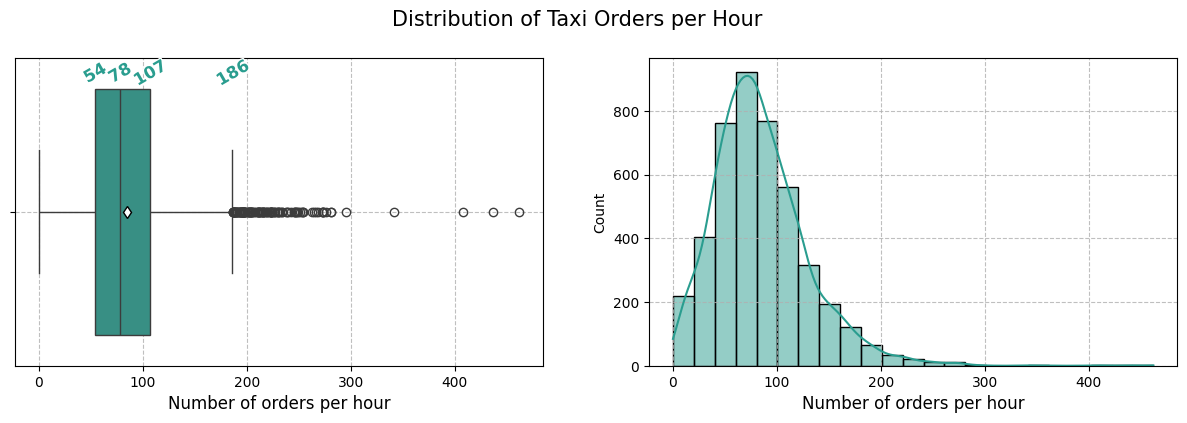

In [9]:
# Visualization of the distribution of the number of taxi orders per hour
box_hist_plot(cln_df, column='num_orders', size=(15,4), width=20, 
              title='Distribution of Taxi Orders per Hour', y_title=1, xlabel='Number of orders per hour', rot=30)

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi jumlah pesanan taksi setiap jam memiliki distribusi *right-skew*.
* Tipikal jumlah pesanan taksi setiap jam pada dataset ini, yaitu sebesar 78 pesanan/jam.
* Jumlah pesanan maksimum pada dataset ini adalah 462 pesanan/jam.
* Jumlah pesanan minimum pada dataset ini adalah 0 pesanan/jam.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi yang tidak simetris pada *time series* merupakan salah satu indikator bahwa data saat ini tidak bersifat stasioner. Distribusi *right-skew* menujukkan bahwa terdapatnya tren positif pada data saat ini seiring perubahan waktu.

</div>

## <a id='toc5_2_'></a>[2) Tren dan Musiman Pada Jumlah Pesanan Taksi](#toc0_)

Berdasarkan analisa distribusi jumlah pesanan taksi pada sesi sebelumnya, diketahui bahwa data tidak simetris dan diindikasikan tidak stasioner dan memiliki tren yang meningkat seiring perubahan waktu. Berikut di bawah ini akan ditampilkan jumlah pesanan taksi setiap jam dari waktu ke waktu.

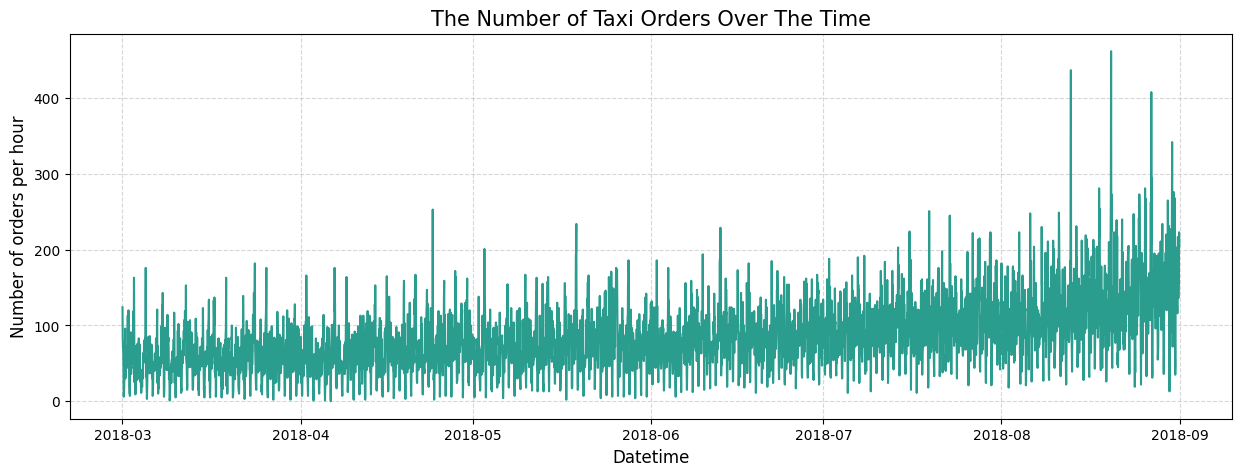

In [10]:
# visulization for time series data over the time
plt.figure(figsize=(15,5))
sns.lineplot(data=cln_df, y='num_orders', x=cln_df.index, color='#2A9D8F')
plt.title("The Number of Taxi Orders Over The Time", size=15)
plt.xlabel("Datetime", size=12)
plt.ylabel("Number of orders per hour", size=12)
plt.grid(alpha=0.5, linestyle='dashed')
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah pesanan taksi setiap jam relatif stabil antara bulan Maret hingga Mei. Akan tetapi, pada bulan Juni hingga akhir Agustus, jumlah pesanan taksi mengalami kenaikan tren. Selain mengalami kenaikan tren, pada bulan Juni-Agustus, varians jumlah pesanan taksi setiap jam juga mengalami peningkatan.
* Terdapatnya tren dan peningkatan varians pada data menunjukkan bahwa data saat ini bersifat non-stasioner.
* Terlihat cukup banyak *spike* pada data yang kemungkinan menunjukkan *seasonality* harian.
* Terdapat sejumlah *spike* yang terlalu tinggi pada sejumlah data. *Spike* seperti ini dapat dikategorikan sebagai *noise* yang akan mengganggu proses pelatihan model.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada rentang bulan Juni-Agustus, bumi belahan utara sedang berada pada musim panas. Musim liburan pada waktu ini mengakibatkan peningkatan aktivitas pariwisata sehingga akan lebih banyak pengunjung di bandara.

</div>

Untuk melihat data secara mendalam, kita akan mengelompokkan data berdasarkan pengelompokan waktu tertentu, seperti kelompok jam dalam sehari (1-24 jam), hari dalam seminggu (Senin-0 &ndash; Minggu-6), hari dalam sebulan (1-30) dan pengelompokan bulan (1-12) dalam setahun. Grafik dibawah akan menampilkan nilai rata-rata jumlah pesanan taksi per jam dan disertai *error bar* dengan *confidence interval* sebesar 95% bahwa rata-rata populasi jumlah pesanan taksi/jam berada dalam rentang *error bar* tersebut.

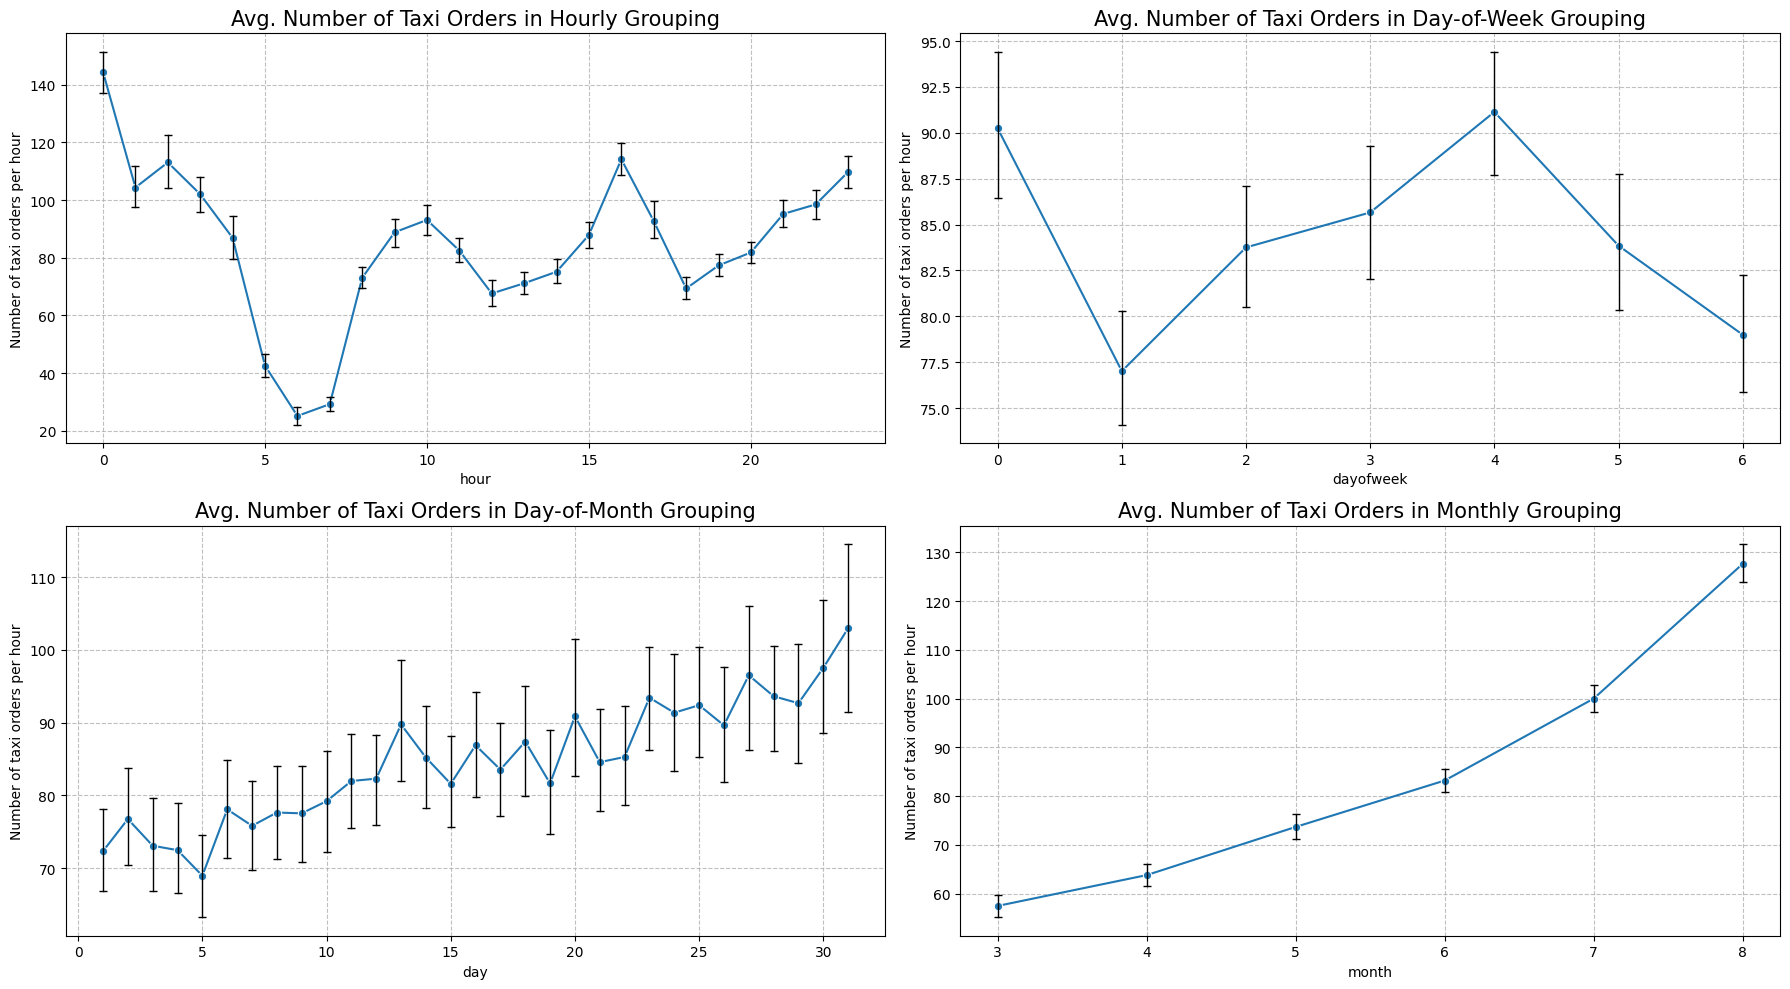

In [11]:
# Plot for the average number of taxi orders in some datetime grouping
data_temp = make_features(cln_df)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
sns.lineplot(ax=ax[0][0], data=data_temp, x='hour', y='num_orders', err_style='bars', err_kws={'linewidth':1, 'ecolor':'black', 'capsize':3}, marker='o')
sns.lineplot(ax=ax[0][1], data=data_temp, x='dayofweek', y='num_orders', err_style='bars', err_kws={'linewidth':1, 'ecolor':'black', 'capsize':3}, marker='o')
sns.lineplot(ax=ax[1][0], data=data_temp, x='day', y='num_orders', err_style='bars', err_kws={'linewidth':1, 'ecolor':'black', 'capsize':3}, marker='o')
sns.lineplot(ax=ax[1][1], data=data_temp, x='month', y='num_orders', err_style='bars', err_kws={'linewidth':1, 'ecolor':'black', 'capsize':3}, marker='o')
for i in [(j,k) for j in range(2) for k in range(2)]:
    ax[i[0]][i[1]].grid(linestyle='dashed', alpha=0.8)
    ax[i[0]][i[1]].set_ylabel('Number of taxi orders per hour')  

ax[0][0].set_title('Avg. Number of Taxi Orders in Hourly Grouping', size=15)
ax[0][1].set_title('Avg. Number of Taxi Orders in Day-of-Week Grouping', size=15) 
ax[1][0].set_title('Avg. Number of Taxi Orders in Day-of-Month Grouping', size=15)
ax[1][1].set_title('Avg. Number of Taxi Orders in Monthly Grouping', size=15)
plt.tight_layout()

In [12]:
# Tabulation for the Data from the Above Graph -- hourly grouping
tmp_hour = data_temp.groupby('hour')['num_orders'].agg(['mean', 'std', 'count'])
sample_mean = tmp_hour['mean']
estimated_standard_error = tmp_hour['std']/np.sqrt(tmp_hour['count'])

tmp_hour['ESE'] = estimated_standard_error
tmp_hour['CI095_lower'], tmp_hour['CI095_upper'] = st.norm(loc=sample_mean, scale=estimated_standard_error).interval(0.95)
tmp_hour.T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
mean,144.402174,104.364130,113.070652,102.021739,86.907609,42.630435,25.173913,29.271739,73.048913,88.831522,...,75.163043,87.945652,114.146739,92.722826,69.358696,77.336957,81.858696,95.211957,98.500000,109.766304
std,49.224380,47.611853,65.815443,44.282125,52.755930,26.754997,21.288345,15.869759,24.663258,35.832929,...,27.418943,30.611211,38.365159,46.331949,28.391903,26.212572,25.786887,32.426860,35.272398,38.966635
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
ESE,3.628869,3.509992,4.851979,3.264522,3.889219,1.972405,1.569398,1.169934,1.818199,2.641639,...,2.021351,2.256688,2.828317,3.415637,2.093079,1.932416,1.901035,2.390540,2.600316,2.872658
CI095_lower,137.289721,97.484672,103.560948,95.623394,79.284880,38.764593,22.097950,26.978710,69.485308,83.654005,...,71.201268,83.522624,108.603340,86.028301,65.256337,73.549490,78.132736,90.526584,93.403475,104.135997
CI095_upper,151.514627,111.243589,122.580356,108.420084,94.530337,46.496277,28.249876,31.564768,76.612519,94.009038,...,79.124819,92.368680,119.690139,99.417351,73.461055,81.124423,85.584655,99.897329,103.596525,115.396611


In [13]:
# Tabulation for the Data from the Above Graph -- day-of-week grouping
tmp_dow = data_temp.groupby('dayofweek')['num_orders'].agg(['mean', 'std', 'count'])
sample_mean = tmp_dow['mean']
estimated_standard_error = tmp_dow['std']/np.sqrt(tmp_dow['count'])

tmp_dow['ESE'] = estimated_standard_error
tmp_dow['CI095_lower'], tmp_dow['CI095_upper'] = st.norm(loc=sample_mean, scale=estimated_standard_error).interval(0.95)
tmp_dow.T

dayofweek,0,1,2,3,4,5,6
mean,90.246795,77.011218,83.754808,85.660494,91.140432,83.847756,78.991987
std,52.236682,39.671462,42.025665,46.341707,46.204676,45.167079,40.518885
count,624.000000,624.000000,624.000000,648.000000,648.000000,624.000000,624.000000
ESE,2.091141,1.588130,1.682373,1.820474,1.815091,1.808130,1.622054
CI095_lower,86.148234,73.898541,80.457417,82.092430,87.582919,80.303886,75.812821
CI095_upper,94.345356,80.123895,87.052198,89.228558,94.697945,87.391627,82.171154


In [14]:
# Tabulation for the Data from the Above Graph -- day-of-month grouping
tmp_dom = data_temp.groupby('day')['num_orders'].agg(['mean', 'std', 'count'])
sample_mean = tmp_dom['mean']
estimated_standard_error = tmp_dom['std']/np.sqrt(tmp_dom['count'])

tmp_dom['ESE'] = estimated_standard_error
tmp_dom['CI095_lower'], tmp_dom['CI095_upper'] = st.norm(loc=sample_mean, scale=estimated_standard_error).interval(0.95)
tmp_dom.T

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
mean,72.347222,76.756944,73.090278,72.479167,68.965278,78.090278,75.826389,77.652778,77.541667,79.215278,...,85.291667,93.437500,91.375000,92.409722,89.631944,96.520833,93.638889,92.680556,97.534722,102.989583
std,34.075671,39.568874,38.206453,37.360644,34.762413,40.634980,34.993772,38.690509,38.654987,40.555610,...,41.006715,45.753477,48.546118,47.314365,47.485846,58.063261,46.071639,49.692432,57.558473,58.374741
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,96.000000
ESE,2.839639,3.297406,3.183871,3.113387,2.896868,3.386248,2.916148,3.224209,3.221249,3.379634,...,3.417226,3.812790,4.045510,3.942864,3.957154,4.838605,3.839303,4.141036,4.796539,5.957847
CI095_lower,66.781632,70.294147,66.850005,66.377040,63.287521,71.453353,70.110845,71.333444,71.228135,72.591316,...,78.594026,85.964569,83.445947,84.681851,81.876065,87.037342,86.113993,84.564274,88.133678,91.312418
CI095_upper,77.912813,83.219742,79.330550,78.581293,74.643034,84.727203,81.541933,83.972112,83.855199,85.839239,...,91.989307,100.910431,99.304053,100.137593,97.387823,106.004325,101.163785,100.796837,106.935767,114.666749


In [15]:
# Tabulation for the Data from the Above Graph -- monthly grouping
tmp_month = data_temp.groupby('month')['num_orders'].agg(['mean', 'std', 'count'])
sample_mean = tmp_month['mean']
estimated_standard_error = tmp_month['std']/np.sqrt(tmp_month['count'])

tmp_month['ESE'] = estimated_standard_error
tmp_month['CI095_lower'], tmp_month['CI095_upper'] = st.norm(loc=sample_mean, scale=estimated_standard_error).interval(0.95)
tmp_month.T

month,3,4,5,6,7,8
mean,57.483871,63.804167,73.682796,83.202778,100.006720,127.651882
std,29.562439,32.036301,34.849825,32.826776,37.254770,56.242228
count,744.000000,720.000000,744.000000,720.000000,744.000000,744.000000
ESE,1.083812,1.193922,1.277657,1.223382,1.365826,2.061940
CI095_lower,55.359639,61.464122,71.178635,80.804994,97.329750,123.610553
CI095_upper,59.608103,66.144212,76.186957,85.600562,102.683690,131.693210


In [16]:
# Avg. value for ESE for any group
print("hour:", tmp_hour['ESE'].mean())
print("dow:", tmp_dow['ESE'].mean())
print("dom:", tmp_dom['ESE'].mean())
print("month:", tmp_month['ESE'].mean())

hour: 2.5804424227410547
dow: 1.7753417798432631
dom: 3.710448050265317
month: 1.3677564295559297


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada pengelompokan berdasarkan jam, terdapat beberapa waktu dimana *peek hours* dan *off-peak hours* terjadi. **Terdapat 3 waktu *peek hours* yaitu pada pukul 12 malam, 10 pagi dan 4 sore** dengan rata-rata nilai sebesar 144 pesanan/jam, 93 pesanan/jam dan 114 pesanan/ jam secara berturut-turut. **Adapun *off-peek hours* terjadi pada pukul 6 pagi, 12 siang, dan 6 sore** dengan rata-rata nilai sebesar 25 pesanan/jam, 68 pesanan/jam, dan 69 pesanan/jam secara berturut-turut.
* Pada pengelompokan *day-of-week*, terdapat hari-hari dimana terjadinya *peak travel days* dan *off-peak travel days*. Terdapat 2 waktu *peak travel days* yaitu pada hari Senin (0) dan Jum'at (4) dengan rata-rata 90 pesanan/jam dan 91 pesanan/jam secara berturut-turut. Adapun *off-peak travel days* terjadi pada hari Selasa (1) dan Minggu (6) dengan rata-rata 77 pesanan/jam dan 79 pesanan/jam secara berturut-turut.
* Rata-rata jumlah pesanan taksi pada pengelompokan *day-of-month* dan pengelompokan bulan menujukkan tren positif. Pada pengelompokan *day-of-month*, nilai rata-rata bergerak volatil di sepanjang tren.
* Berdasarkan *error bar* yang ditampilkan, rata-rata nilai ESE (*Estimated Standard Error*) untuk pengelompokan jam, *day-of-week*, *day-of-month*, dan bulan secara berurutan, yaitu 2.58 pesanan/jam, 1.78 pesanan/jam, 3.71 pesanan/jam, dan 1.37 pesanan/jam.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dibutuhkan lebih banyak taksi yang *standby* di bandara pada pukul 12 malam, 10 pagi dan 4 sore, sedangkan pada jam 6 pagi, 12 siang, dan 6 sore, jumlah taksi yang *standby* di bandara dapat dikurangi.
* Jumlah taksi yang tersedia di bandara pada hari Senin dan Jum'at harus lebih banyak dari hari biasanya.
* Analisa *seasonality* pada periode tahunan tidak dapat dilakukan karena tidak tercapainya 2 x 1 siklus tahunan (1-12 bulan).
* **Untuk memperkirakan jumlah rata-rata pesanan/jam pada hari tertentu, pengelompokan *day-of-week* akan menjanjikan hasil yang lebih akurat** dibandingkan *day-of-month* karena pengelompokan *day-of-week* memiliki rata-rata nilai ESE yang lebih kecil.
* **Pengelompokan *day-of-week* dapat memberi tahu seberapa banyak jumlah taksi yang harus disediakan setiap harinya** secara akurat dibandingkan pengelompokan *day-of-month*, akan tetapi pengelompokan ini tidak cukup baik dalam menangani fluktuasi permintaan taksi pada jam-jam tertentu. **Oleh karena itu, pengelompokan jam dapat dikombinasikan dalam estimasi tersebut**.


</div>

Berikutnya, kita akan melakukan penguraian (dekomposisi) data untuk melihat pola *trend*, *seasonality* dan *residue* pada data jumlah pesanan taksi setiap jam. Akibat tren pada data *time series* memiliki bentuk linear, maka metode *additive* akan digunakan untuk proses dekomposisi data.

Proses dekomposi akan dilakukan dengan penguraian *seasonality* pada sejumlah nilai periode tertentu. Hal ini  bertujuan untuk mengetahui pengaruh nilai periode terhadap tren dan musiman. Adapun periode yang akan digunakan antara lain:
1. Periode harian (period = 24 jam)
2. Periode mingguan (period = 7 x 24 jam)
3. Periode bulanan (period = 30 x 24 jam)

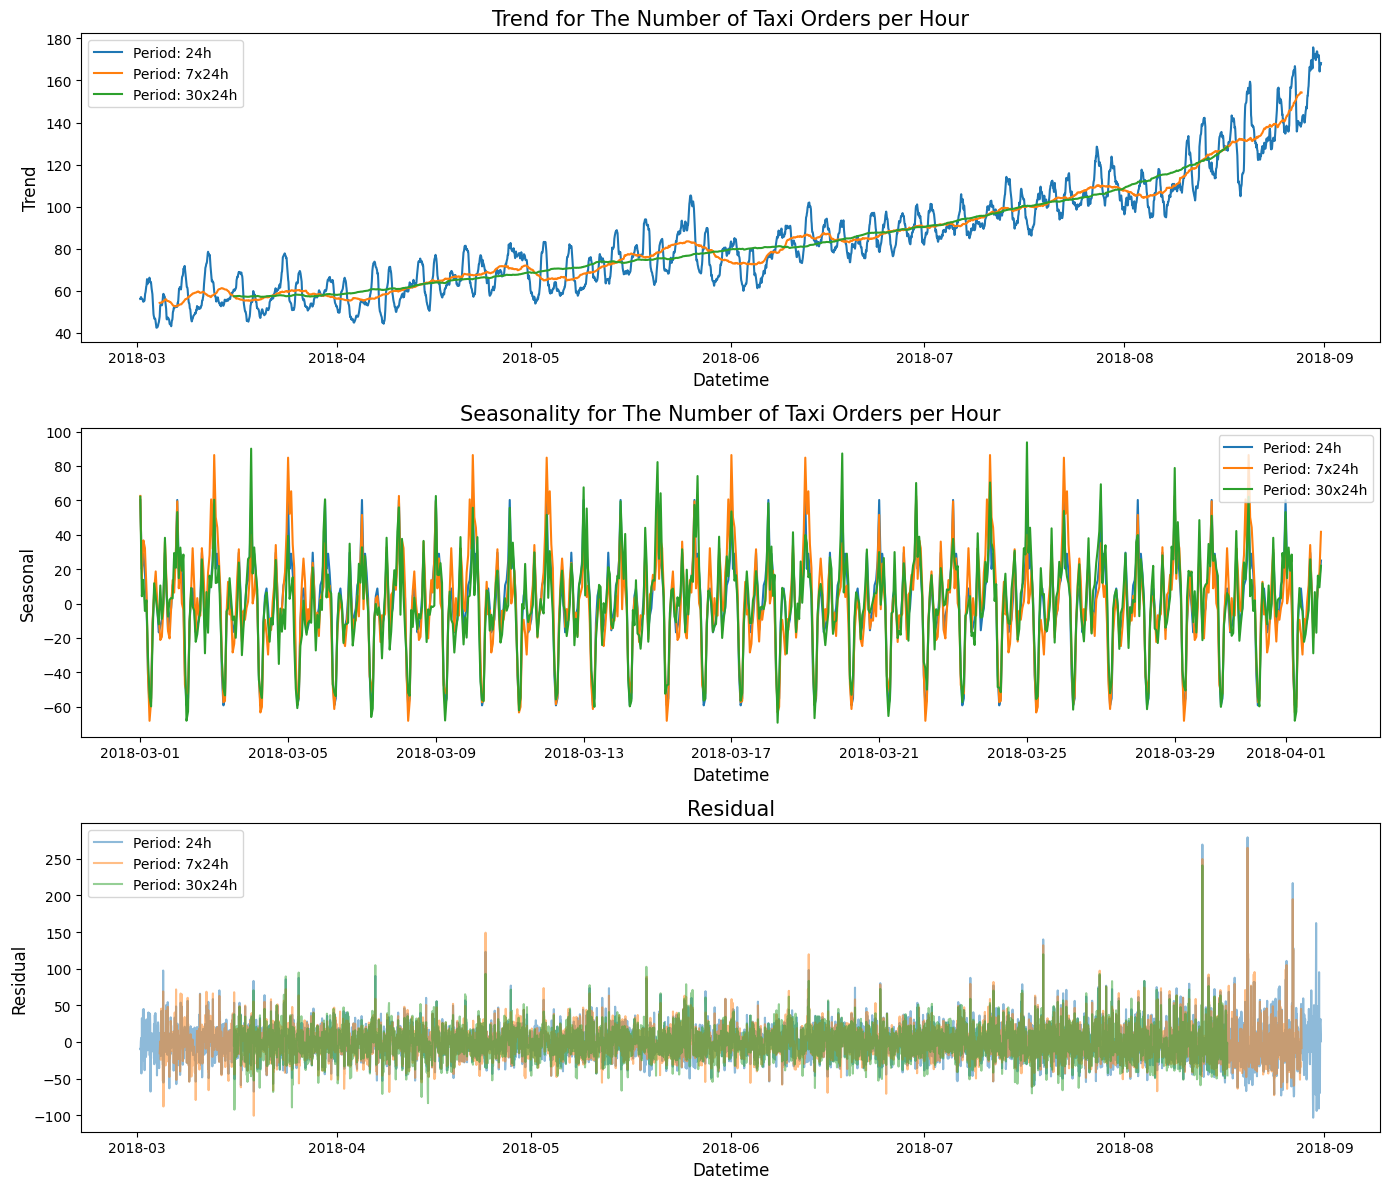

In [17]:
# Visualization of Data Decomposition to Identify Trend, Seasonality, and Residual
periods = {'Period: 24h':1*24, 'Period: 7x24h':7*24, 'Period: 30x24h':30*24}
fig, ax = plt.subplots(nrows=3, figsize=(14,12))

for i,j in periods.items():
    df_decomposed = seasonal_decompose(cln_df, model='additive', period=j)
    
    sns.lineplot(ax=ax[0], data=df_decomposed.trend, label=i)
    sns.lineplot(ax=ax[1], data=df_decomposed.seasonal['2018-03-01':'2018-04-01'], label=i)
    sns.lineplot(ax=ax[2], data=df_decomposed.resid, alpha=0.5, label=i)

ax[0].set_title('Trend for The Number of Taxi Orders per Hour', size=15)
ax[1].set_title('Seasonality for The Number of Taxi Orders per Hour', size=15)
ax[2].set_title('Residual', size=15)

for i,j in enumerate(['Trend', 'Seasonal', 'Residual']):
    ax[i].set_xlabel("Datetime", size=12)
    ax[i].set_ylabel(j, size=12)

plt.tight_layout()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Tren yang dihasilkan dari dekomposisi menggunakan periode `30x24h` menunjukkan hasil yang lebih *smoooth*. Adapun dekomposisi menggunakan periode `7x24h` memiliki sedikit fluktuasi. Dan pada dekomposisi menggunakan periode `24h`, menghasilkan tren yang sangat fluktuatif dibandingkan 2 lainnya.
* Tidak terdapat pengaruh yang berarti pada pola *seasonality* akibat parameter periode dekomposisi. **Pola *seasonality* menunjukkan siklus harian yang cukup kuat**. Pengaruh periode dekomposisi menghasilkan perbedaan ukuran nilai *seasonality*, tetapi tidak terlalu signifikan.
* Pada sisi *residual*, nilai yang dihasilkan untuk setiap periode dekomposisi tidak menunjukkan nilai yang berbeda secara signifikan.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Untuk menghasilkan model yang tidak *high-variance* (*overfitting*), maka tren harus *smooth*. Akan tetapi, tren yang terlalu *smooth* dapat menghasilkan model yang *high-bias* (*underfitting*). Oleh karena itu, pada pembuatan fitur *rolling statistics*, kita perlu menguji sejumlah ukuran *window* berdasarkan periode `24h`, `7x24h` dan `30x24h`.

</div>

## <a id='toc5_3_'></a>[3) Uji Stasioneritas dan Melakukan *Differencing* Data *Time Series*](#toc0_)

Pada bagian sebelumnya, diketahui bahwa **secara visual data memiliki tren linear positif dan varians yang meningkat sehingga tidak memenuhi persyaratan deret  stasioner**. Untuk merancang model *machine-learning* yang baik, data *time series* harus memiliki sifat stasioner. Oleh karena itu kita perlu melakukan *differencing* pada data agar *time series* menjadi deret stasioner.

Untuk pembuktian secara statistik, berikut di bawah ini akan dilakukan uji statistik yang menilai apakah data *time series* saat ini (sebelum *differencing*) bersifat stasioner atau non-stasioner menggunakan 3 metode, yaitu:
1. **Independent t-test & Levene Test** : Membagi data *timeseries* menjadi 2 bagian, kemudian melakukan uji varians dan rata-rata sampel.
2. **Augmented DIckey-Fuller (ADF) Test**.
3. **Kwiatkowski-Philip-Schmidth-Shin (KPSS) Test**.

In [18]:
# function for stationary testing
def ind_2sample_test(timeseries, pvalue_critical:float):
    print("Results of 2 Sample Independent t-Test & Levene Test:")
    split = round(0.5*timeseries.shape[0])
    x1 = timeseries[:split]
    x2 = timeseries[split:]
    # levene test
    levene_test = st.levene(x1.values.reshape(-1), x2.values.reshape(-1))
    if levene_test.pvalue > pvalue_critical:
        # H0 accepted - the 2 samples have equal variance
        print("H0 accepted - Timeseries has stationary variance")
        tt_ind = st.ttest_ind(x1, x2, equal_var=True, random_state=101010)
    else:
        # H0 rejected - the 2 samples have non-equal variance
        print("H0 rejected - Timeseries has non-stationary variance")
        tt_ind = st.ttest_ind(x1, x2, equal_var=False, random_state=101010)
    
    if tt_ind.pvalue > pvalue_critical:
        # H0 accepted - the 2 samples have equal mean
        print("H0 accepted - Timeseries has stationary mean")
    else:
        # H0 rejected - the 2 sample have non-equal mean
        print("H0 rejected - Timeseries has non-stationary mean")
    
    print(90*"=")   
    print(f"data x1 ({x1.index.min()}-{x1.index.max()}) >> mean: {x1['num_orders'].mean():.2f}, variance: {x1['num_orders'].var():.2f}")
    print(f"data x2 ({x2.index.min()}-{x2.index.max()}) >> mean: {x2['num_orders'].mean():.2f}, variance: {x2['num_orders'].var():.2f}")
    print()

def adf_test(timeseries, regression:str, pvalue_critical:float):
    """
    regression{“c”,”ct”,”ctt”,”n”}
    Constant and trend order to include in regression.
        “c” : constant only.
        “ct” : constant and trend.
        “ctt” : constant, and linear and quadratic trend.
        “n” : no constant, no trend.
    """
    adftest = adfuller(x=timeseries, regression=regression)
    output = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in adftest[4].items():
        output[f"Critical Value ({key})"] = value
        
    print("Results of Dickey-Fuller Test:")
    if adftest[1]>pvalue_critical:
        print("H0 accepted - Timeseries is non-stationary")
    else:
        print("H0 rejected - Timeseries is stationary")
    print(50*'=')
    print(output, "\n")

def kpss_test(timeseries, regression:str, pvalue_critical:float):
    """
    regression{“c”,”ct”}
    Constant and trend order to include in regression.
        “c” : constant only.
        “ct” : constant and trend.
    """
    kpsstest = kpss(timeseries, regression=regression)
    output = pd.Series(kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    for key, value in kpsstest[3].items():
        output[f"Critical Value ({key})"] = value
        
    print("Results of KPSS Test:")
    if kpsstest[1]>pvalue_critical:
        print("H0 accepted - Timeseries is stationary")
    else:
        print("H0 rejected - Timeseries is non-stationary")
    print(50*'=')
    print(output, "\n")

In [19]:
# statistical testing to check the stationarity of data before differencing
ind_2sample_test(timeseries=cln_df, pvalue_critical=0.05)
adf_test(timeseries=cln_df, regression='ct', pvalue_critical=0.05)
kpss_test(timeseries=cln_df, regression='ct', pvalue_critical=0.05)

Results of 2 Sample Independent t-Test & Levene Test:
H0 rejected - Timeseries has non-stationary variance
H0 rejected - Timeseries has non-stationary mean
data x1 (2018-03-01 00:00:00-2018-05-31 23:00:00) >> mean: 65.00, variance: 1082.37
data x2 (2018-06-01 00:00:00-2018-08-31 23:00:00) >> mean: 103.84, variance: 2218.26

Results of Dickey-Fuller Test:
H0 rejected - Timeseries is stationary
Test Statistic                -8.326522e+00
p-value                        1.258392e-11
#Lags Used                     3.000000e+01
Number of Observations Used    4.385000e+03
Critical Value (1%)           -3.960836e+00
Critical Value (5%)           -3.411492e+00
Critical Value (10%)          -3.127640e+00
dtype: float64 

Results of KPSS Test:
H0 rejected - Timeseries is non-stationary
Test Statistic           1.554138
p-value                  0.010000
Lags Used                7.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical V

C:\Users\andik\AppData\Local\Temp\ipykernel_9392\3596517414.py:67: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression=regression)


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari tiga metode pengujian statistik, hanya metode ADF test yang menunjukkan bahwa *time series* bersifat stasioner, sedangkan 2 metode lainnya menyimpulkan bahwa deret memiliki sifat non-stasioner.
* Pada metode *Independent test & Levene Test* diperoleh kesimpulan bahwa baik nilai rata-rata maupun varians tidak bernilai konstan sepanjang waktu.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dapat disimpulkan bahwa data *time series* sebelum proses *differencing* merupakan deret non-stasioner. Perlu dilakukan proses *differencing* sebelum melakukan analisa ACF dan PACF serta sebelum melatih model.

</div>

Dari hasil sebelumnya diketahui bahwa data *time series* saat ini bersifat non-stasioner. Oleh karena itu, agar data menjadi stasioner, kita harus menyelisihkan nilai saat ini (t) dengan nilai sebelumnya (t-1) atau disebut dengan proses *differencing*. Berikut dibawah ini, akan dilakukan uji statistik untuk data *time series* yang telah melewati proses *differencing* orde 1.

In [20]:
# statistical testing to check the stationarity of data after differencing (orde 1)
diff_1 = cln_df.diff().dropna()
ind_2sample_test(timeseries=diff_1, pvalue_critical=0.05)
adf_test(timeseries=diff_1, regression='ct', pvalue_critical=0.05)
kpss_test(timeseries=diff_1, regression='ct', pvalue_critical=0.05)

Results of 2 Sample Independent t-Test & Levene Test:
H0 rejected - Timeseries has non-stationary variance
H0 accepted - Timeseries has stationary mean
data x1 (2018-03-01 01:00:00-2018-06-01 00:00:00) >> mean: -0.00, variance: 1022.57
data x2 (2018-06-01 01:00:00-2018-08-31 23:00:00) >> mean: 0.04, variance: 2024.01

Results of Dickey-Fuller Test:
H0 rejected - Timeseries is stationary
Test Statistic                -1.579885e+01
p-value                        1.192715e-22
#Lags Used                     3.100000e+01
Number of Observations Used    4.383000e+03
Critical Value (1%)           -3.960837e+00
Critical Value (5%)           -3.411492e+00
Critical Value (10%)          -3.127640e+00
dtype: float64 

Results of KPSS Test:
H0 accepted - Timeseries is stationary
Test Statistic             0.02066
p-value                    0.10000
Lags Used                139.00000
Critical Value (10%)       0.11900
Critical Value (5%)        0.14600
Critical Value (2.5%)      0.17600
Critical Value

C:\Users\andik\AppData\Local\Temp\ipykernel_9392\3596517414.py:67: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression=regression)


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Setelah dilakukan *differencing* orde 1, metode ADF test dan KPSS test menujukkan kesimpulan bahwa data bersifat stasioner. Adapun pada metode *Independent test & Levene Test*, hanya komponen rata-rata yang bersifat stasioner sedangkan varians bersifat non-stasioner.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dapat disimpulkan bahwa data *time series* setelah proses *differencing* orde 1 bersifat stasioner.

</div>

## <a id='toc5_4_'></a>[4) Analisa ACF dan PACF Pada *Time Series*](#toc0_)

Pada analisa stasioneritas data *time series* pada bagian sebelumnya, diketahui bahwa perlu dilakukan proses *differencing* orde 1 agar data kita memiliki sifat stasioner. Pada analisa ACF (*auto-correlation function*) dan PACF (*partial auto-correlation function*), data *time series* yang digunakan pada analisis ini diasumsikan bersifat stasioner sehingga kita perlu melakukan *differencing* terlebih dahulu sebelum melakukan analisis pada sesi ini.

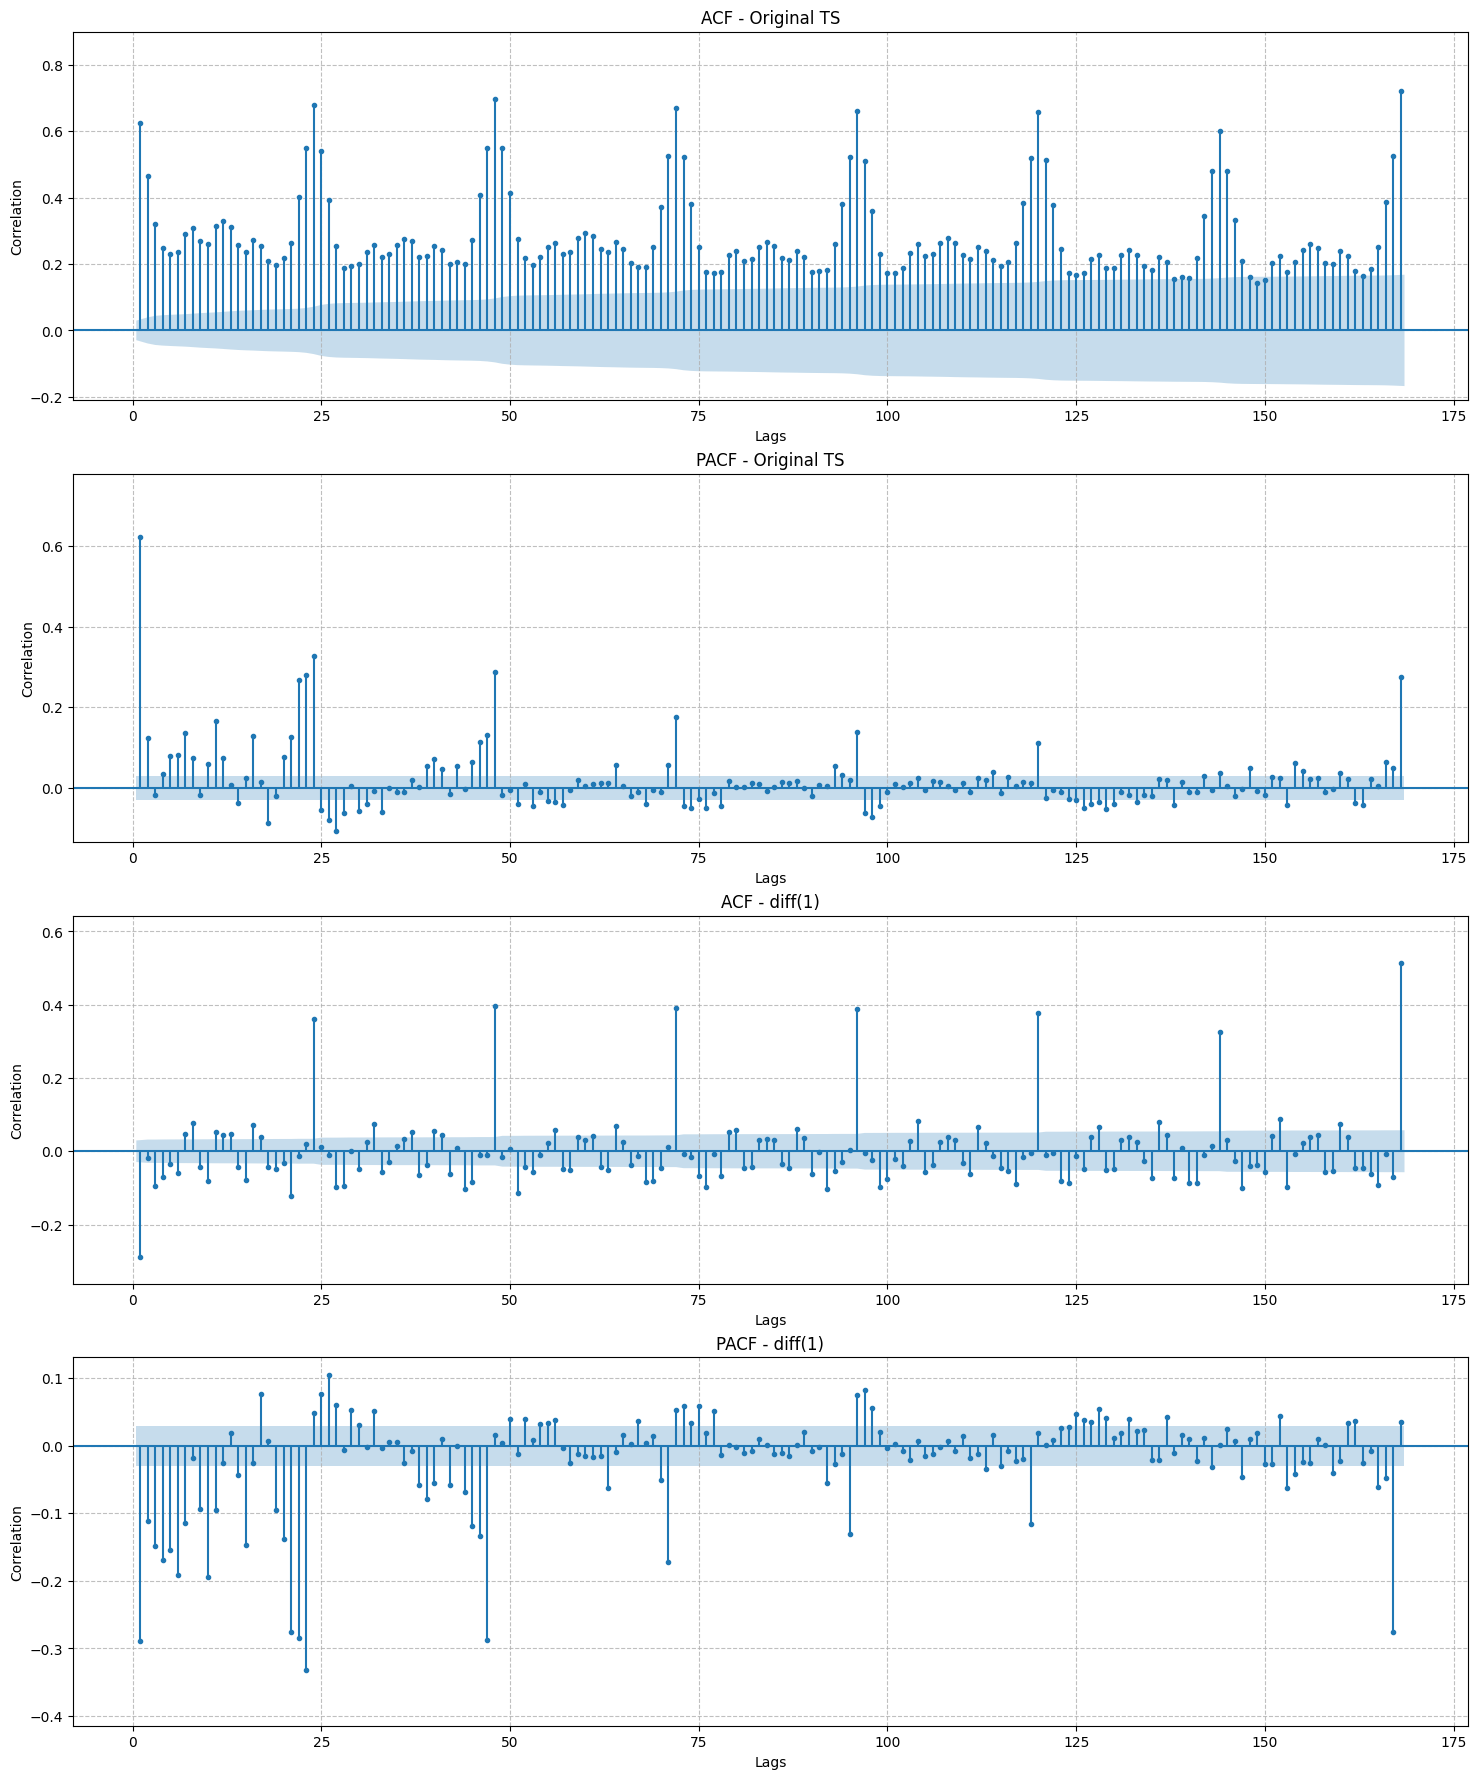

In [21]:
# displays the ACF and PACF plots
diff_1 = cln_df.diff().dropna()

fig, ax = plt.subplots(nrows=4, figsize=(18,22))
plot_acf(ax=ax[0], x=cln_df, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='ACF - Original TS')
plot_pacf(ax=ax[1], x=cln_df, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='PACF - Original TS')
plot_acf(ax=ax[2], x=diff_1, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='ACF - diff(1)')
plot_pacf(ax=ax[3], x=diff_1, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='PACF - diff(1)')
for i in range(4):
    ax[i].set_ylabel("Correlation")
    ax[i].set_xlabel("Lags")
    ax[i].grid(linestyle='dashed', alpha=0.8)

plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada original TS terlihat banyak sekali *significant lags* bahkan hingga 7x24 *lags*. Hal ini menunjukkan bahwa original TS bersifat non-stasioner.
* Pada plot ACF dan PACF, baik pada orginal TS maupun diff(1), menunjukkan *seasonality* yang kuat pada periode harian (setiap 24 lag).
* Pada plot PACF original TS maupun diff(1) menunjukkan *seasonality* juga terjadi pada periode mingguan, dimana *spike* yang semula menurun setiap 24 *lags* kembali meningkat setelah 1 minggu (7x24 *lags*).
* Kontur ACF pada data diff(1) menunjukkan kontur *significant spike* pada *lag* tertentu tetapi pada *lag* lainnya mengalami penurunan drastis (terdapat pula beberapa *lag* memiliki ACF yang tidak *significant*). *Significant correlation* pada *first lags* hanya ditemui pada *lag-1* saja sedangkan setelahnya langsung menurun drastis menjadi *insignificant lag*.
* Kontur PACF pada data diff(1) menunjukkan sejumlah *significant lags* pada *first lags*. Pada *first lags* setidaknya ditemukan sebanyak 7 *lags* dengan ACF bernilai *significant*.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Analisa ACF berperan penting dalam memberi arahan tentang orde *moving average* yang tepat dalam model ARMA, ARIMA, dan sejenisnya. Adapun analisa PACF berperan penting dalam memberi arahan tentang orde *auto-regressive* yang tepat dalam model ARMA, ARIMA, dan sejenisnya.
* Terdapatnya *seasonality* serta kontur ACF-diff(1) yang turun seketika dengan kontur PACF-diff(1) yang memiliki *significant lags* pada beberapa *lag* awal menunjukkan bahwa perlu menggunakan model yang dapat melakukan kalkulasi *seasonality* dan *moving average* seperti SARIMA.
* Penggunakan nilai pada rentang 0 hingga 7x24 *lags* dapat menjadi acuan dalam penentuan orde pada parameter  model SARIMA.

</div>

# <a id='toc6_'></a>[**F. Membangun Model *Machine-learning***](#toc0_)

## <a id='toc6_1_'></a>[1) *Features Engineering*](#toc0_)

Model yang akan dievaluasi pada proyek ini yaitu model **OLS**, **SARIMA**, **Random Forest Regressor**, dan **XGBoost Regressor**. Pada model **SARIMA**, *feature engineering* tidak perlu dilakukan sebab hal-hal tersebut telah tersedia pada parameter model SARIMA. Adapun pada model lainnya, proses *feature engineering* seperti penambahan fitur dan proses *differencing* perlu dilakukan.

Disebabkan konfigurasi *feature engineering* yang mungkin berbeda untuk satu model dengan model yang lainnya, maka pada sesi ini kita akan membangun *class **`DataPreparation`*** yang dapat mengatur konfigurasi pengayaan fitur, melakukan *differencing*, dan melakukan *inverse transform* pada hasil *differencing*.

In [22]:
# class for feature engineering
class DataPreparation:
    def __init__(self):
        self.ts = None
        self.lag = None
        self.window_size = None
        self.orde_diff = None
        self.diff_ref = None # dataframe to store differencing process information
    
    def fit(self, timeseries, lag:list[int]=None, window_size:int=None,
                 orde_diff:int=0, dt_feature=['hour', 'day', 'dayofweek', 'month']):
        self.ts = timeseries
        self.lag = lag
        self.window_size = window_size
        self.orde_diff = orde_diff
        self.dt_feature = dt_feature
        
        self.diff_ref = self.ts.copy()
        for i in range(self.orde_diff-1):
            self.diff_ref[f'diff_{i+1}'] = self.diff_ref[self.diff_ref.columns[-1]].diff()
    
    @staticmethod
    def add_features(data:pd.DataFrame, lag:list[int]=None, window_size=None, dt_feature=['hour', 'day', 'dayofweek', 'month']):
        # time-based features
        df = data.copy()
        if 'hour' in dt_feature:
            df['hour'] = df.index.hour
        if 'day' in dt_feature:
            df['day'] = df.index.day
        if 'dayofweek' in dt_feature:
            df['dayofweek'] = df.index.dayofweek
        if 'month' in dt_feature:
            df['month'] = df.index.month
        
        # lag features --> autoregressive features
        if lag: # will be executed if the variable has a value
            for i in lag:
                df[f"lag_{i}"] = df['num_orders'].shift(i)
        
        # rolling statistics features
        if window_size: # will be executed if the variable has a value
            rolling_window = df['num_orders'].rolling(window_size)
            df['rolling_mean (t-1)'] = rolling_window.mean().shift(1)
            df['rolling_std (t-1)'] = rolling_window.std().shift(1)
        
        return df
    
    def features_engineering(self):
        df = self.add_features(data=self.ts, lag=self.lag, window_size=self.window_size, dt_feature=self.dt_feature)
        for i in range(self.orde_diff):
            df[self.ts.columns[0]] = df[self.ts.columns[0]].diff()
        
        return df.dropna()
    
    def diff_inv_transform(self, diff_ts:pd.Series):
        transform_list = []
        index_list = []
        for i in range(len(diff_ts)):
            current_index = diff_ts.iloc[[i]].index
            prev_index = current_index.shift(-1)
            
            transform_list.append(diff_ts[current_index[0]] + self.diff_ref.loc[prev_index[0]].sum())
            index_list.append(current_index[0])

        return pd.Series(data=transform_list, index=index_list)  


In [23]:
# q = DataPreparation()
# q.fit(cln_df, [24, 48], 7*24, 3)
# q.features_engineering()['num_orders']
# a = q.diff_inv_transform(q.features_engineering()['num_orders'])
# a

In [24]:
# (a != cln_df['num_orders'].loc[a.index]).sum()

## <a id='toc6_2_'></a>[2) *Model Optimization*](#toc0_)

### <a id='toc6_2_1_'></a>[**Ordinary Least Square (OLS) Regression**](#toc0_)

Pada bagian ini, kita akan melakukan optimasi model regresi linear menggunakan **OLS Method**. Optimasi yang akan dilakukan berkaitan dengan pengaturan konfigurasi kolom apa saja yang akan digunakan pada pelatihan model. Terdapat sejumlah fitur yang dapat diatur pada proyek ini, yaitu *lag feature* dan *window statistics feature*. Adapun pada sisi *target*, konfigurasi yang dapat diatur yaitu nilai orde *differencing* yang digunakan.

Berdasarkan hasil **Analisa Data Eksploratif (EDA)**, berikut konfigurasi fitur dan target yang akan diuji pada model **OLS Regression**.
1. **`orde_diff`**.<br> Pada tahap EDA, secara visual dan uji statistik menyimpulkan bahwa *original data* bersifat non-stasioner. Akan tetapi, pada sesi ini kita akan menguji apakah stasioneritas mempengaruhi kinerja model **OLS Regression** atau tidak. Kita akan menggunakan `orde_diff = 0` untuk *original data* yang non-stasioner dan `orde_diff = 1` untuk melakukan *differencing* orde 1 pada data agar menjadi stasioner.
2. **`lag`**.<br> Pada tahap EDA kita telah melakukan analisa *seasonality* dan ACF/PACF. Dari kedua analisa tersebut diketahui bahwa terdapat musiman dengan periode 24 jam (setiap 24 *lags*). Dari kurva ACF/PACF-diff(1) diperoleh sejumlah *lags* yang berkorelasi kuat dengan data saat ini, diantaranya:
    * *Significant first lags*, yaitu pada lag-1 hingga lag-7.
    * *significant periodic spikes*, yaitu pada lag-$(23+24i,~untuk~i=0~to~4)$ untuk kurva PACF dan lag-$(24i,~untuk~i=1~to~5)$ untuk kurva ACF.
3. **`window_size`**.<br> Pada tahap EDA, diketahui bahwa penguraian *seasonality* ketika menggunakan periode `24h`, `7x24h`, maupun `30x24h` tidak mempengaruhi proses dekomposisi *seasonality*. Bahkan, penggunaan periode `30x24h` menghasilkan tren yang lebih *smooth*. Oleh karena itu, kita akan menguji 3 nilai `window_size`, yaitu `24h`, `7x24h` dan `30x24h` sehingga diperoleh nilai terbaik.

#### <a id='toc6_2_1_1_'></a>[a. Skema 1 : Uji coba pada data stasioner, `orde_diff = 1`](#toc0_)

Pada skema ini, kita akan menggunakan `window_size = 24` terlebih dahulu, setelahnya kita akan mengevaluasi nilai `window_size` tersebut.

In [25]:
# data preparation
dataprep_ols = DataPreparation()
dataprep_ols.fit(timeseries=cln_df, 
                 lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                 window_size=24, 
                 orde_diff=1)
ols_df = dataprep_ols.features_engineering()

# data split
train_df, val_df = train_test_split(ols_df, test_size=0.4, shuffle=False)
val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_val = val_df.drop('num_orders', axis=1)
y_val = val_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_val[x_val.columns] = scaler.transform(x_val)

# add constant to X variable
x_train = sm.add_constant(x_train)
x_val = sm.add_constant(x_val)

# training model
model = sm.OLS(y_train, x_train).fit()

# predictions
y_true_train = dataprep_ols.diff_inv_transform(y_train)
y_true_val = dataprep_ols.diff_inv_transform(y_val)
y_pred_train = dataprep_ols.diff_inv_transform(model.predict(x_train))
y_pred_val = dataprep_ols.diff_inv_transform(model.predict(x_val))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)  : {np.sqrt(mean_squared_error(y_true_train, y_pred_train)):.2f} number of orders")
print(f"RMSE (val)    : {np.sqrt(mean_squared_error(y_true_val, y_pred_val)):.2f} number of orders")
print(f"{'':=^80}\n")

# view model summary
print(model.summary())

================================== RMSE Score ==================================
RMSE (train)  : 20.41 number of orders
RMSE (val)    : 25.35 number of orders

                            OLS Regression Results                            
Dep. Variable:             num_orders   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:01:24   Log-Likelihood:                -11429.
No. Observations:                2577   AIC:                         2.291e+04
Df Residuals:                    2553   BIC:                         2.305e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Skor RMSE yang diperoleh dari prediksi data *training* dan *validation* secara berturut-turut, yaitu 20 dan 25 pesanan taksi secara berurutan.
* Skor *R-squared* yang diperoleh untuk model ini yaitu sebesar 0.608. Hal ini menunjukkan bahwa 60.8% variasi jumlah pesanan taksi dapat dijelaskan oleh seluruh fitur yang digunakan dalam model regresi.
* *F-statistics* dan *P-value* untuk model ini yaitu sebesar 172.2 dan 0.00 secara berurutan. Nilai *P-value* yang kurang dari 5% menunjukkan bahwa seluruh fitur yang digunakan berguna untuk menjelaskan variasi jumlah pesanan taksi secara *significant*.
* Dari seluruh koefisien fitur, fitur dengan nilai *P-value* (P>|t|) $\le$ 5% yaitu `day`, `dayofweek`, `month`, `lag_1`, `lag_2`, `lag_7`, `lag_23`, `lag_47`, `lag_24`, `lag_48`, `lag_72`, `lag_96`, `lag_120`, dan `rolling_mean (t-1)`. Fitur dengan nilai *P-value* kurang dari 5% menujukkan bahwa fitur tersebut secara *significant* berhubungan dengan jumlah pesanan taksi.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil prediksi, model **OLS Regression** dengan konfigurasi saat ini telah berhasil memenuhi persyaratan RMSE maksimum, yaitu 48 pesanan taksi.

</div>

Berikutnya kita akan mencoba membandingkan nilai `window_size` terbaik dari 3 opsi yang ada &mdash; `24h`, `7x24h`, dan `30x24h` &mdash; sehingga menghasilkan skor RMSE seminimal mungkin.

In [26]:
for key,value in {'24h':24, '7x24h':7*24, '30x24h':30*24}.items():
    # data preparation
    dataprep_ols = DataPreparation()
    dataprep_ols.fit(timeseries=cln_df, 
                    lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                    window_size=value, 
                    orde_diff=1)
    ols_df = dataprep_ols.features_engineering()

    # data split
    train_df, val_df = train_test_split(ols_df, test_size=0.4, shuffle=False)
    val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

    # separates features and target
    x_train = train_df.drop('num_orders', axis=1)
    y_train = train_df['num_orders']
    x_val = val_df.drop('num_orders', axis=1)
    y_val = val_df['num_orders']
    x_test = test_df.drop('num_orders', axis=1)
    y_test = test_df['num_orders']

    # features scaling
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train[x_train.columns] = scaler.transform(x_train)
    x_val[x_val.columns] = scaler.transform(x_val)

    # add constant to X variable
    x_train = sm.add_constant(x_train)
    x_val = sm.add_constant(x_val)

    # training model
    model = sm.OLS(y_train, x_train).fit()

    # predictions
    y_true_train = dataprep_ols.diff_inv_transform(y_train)
    y_true_val = dataprep_ols.diff_inv_transform(y_val)
    y_pred_train = dataprep_ols.diff_inv_transform(model.predict(x_train))
    y_pred_val = dataprep_ols.diff_inv_transform(model.predict(x_val))

    # rmse score
    print(f"{f' RMSE Score - MA{key} ':=^80}")
    print(f"RMSE (train)  : {np.sqrt(mean_squared_error(y_true_train, y_pred_train)):.2f} number of orders")
    print(f"RMSE (val)    : {np.sqrt(mean_squared_error(y_true_val, y_pred_val)):.2f} number of orders")
    print(f"{'':=^80}\n")

============================== RMSE Score - MA24h ==============================
RMSE (train)  : 20.41 number of orders
RMSE (val)    : 25.35 number of orders

============================= RMSE Score - MA7x24h =============================
RMSE (train)  : 20.47 number of orders
RMSE (val)    : 25.48 number of orders

============================ RMSE Score - MA30x24h =============================
RMSE (train)  : 21.15 number of orders
RMSE (val)    : 26.89 number of orders



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil di atas, dapat disimpulkan bahwa *window size* terbaik dalam perhingan *rolling statistics* yaitu sebesar `24h`.
</div>

#### <a id='toc6_2_1_2_'></a>[b. Skema 2 : Uji coba pada data non-stasioner, `orde_diff = 0`](#toc0_)

Pada skema ini, kita akan menggunakan `window_size = 24` dan akan membandingkan hasilnya dengan Skema sebelumnya (`orde_diff=1`).

In [27]:
# data preparation
dataprep_ols = DataPreparation()
dataprep_ols.fit(timeseries=cln_df, 
                 lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                 window_size=24, 
                 orde_diff=0)
ols_df = dataprep_ols.features_engineering()

# data split
train_df, val_df = train_test_split(ols_df, test_size=0.4, shuffle=False)
val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_val = val_df.drop('num_orders', axis=1)
y_val = val_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_val[x_val.columns] = scaler.transform(x_val)

# add constant to X variable
x_train = sm.add_constant(x_train)
x_val = sm.add_constant(x_val)

# training model
model = sm.OLS(y_train, x_train).fit()

# predictions
y_true_train = dataprep_ols.diff_inv_transform(y_train)
y_true_val = dataprep_ols.diff_inv_transform(y_val)
y_pred_train = dataprep_ols.diff_inv_transform(model.predict(x_train))
y_pred_val = dataprep_ols.diff_inv_transform(model.predict(x_val))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)  : {np.sqrt(mean_squared_error(y_true_train, y_pred_train)):.2f} number of orders")
print(f"RMSE (val)    : {np.sqrt(mean_squared_error(y_true_val, y_pred_val)):.2f} number of orders")
print(f"{'':=^80}\n")

# view model summary
print(model.summary())

================================== RMSE Score ==================================
RMSE (train)  : 20.41 number of orders
RMSE (val)    : 25.35 number of orders

                            OLS Regression Results                            
Dep. Variable:             num_orders   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:01:32   Log-Likelihood:                -11429.
No. Observations:                2577   AIC:                         2.291e+04
Df Residuals:                    2553   BIC:                         2.305e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Skor RMSE yang diperoleh dari prediksi data *training* dan *testing* secara berturut-turut, yaitu 20 dan 25 pesanan taksi secara berurutan.
* Skor *R-squared* yang diperoleh untuk model ini yaitu sebesar 0.626. Hal ini menunjukkan bahwa 62.6% variasi jumlah pesanan taksi dapat dijelaskan oleh seluruh fitur yang digunakan dalam model regresi.
* *F-statistics* dan *P-value* untuk model ini yaitu sebesar 185.7 dan 0.00 secara berurutan. Nilai *P-value* yang kurang dari 5% menunjukkan bahwa seluruh fitur yang digunakan berguna untuk menjelaskan variasi jumlah pesanan taksi secara *significant*.
* Dari seluruh koefisien fitur, fitur dengan nilai *P-value* (P>|t|) $\le$ 5% yaitu ``day`, `dayofweek`, `month`, `lag_1`, `lag_2`, `lag_7`, `lag_23`, `lag_47`, `lag_24`, `lag_48`, `lag_72`, `lag_96`, `lag_120`, dan `rolling_mean (t-1)`. Fitur dengan nilai *P-value* kurang dari 5% menujukkan bahwa fitur tersebut secara *significant* berhubungan dengan jumlah pesanan taksi.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Skor *R-squared* pada skema ini (`orde_diff=0`) bernilai lebih besar dibandingkan skema sebelumnya (`orde_diff=1`), tetapi hanya berbeda sebesar 0.018.
* Skor RMSE yang dihasilkan pada skema ini sama dengan skema sebelumnya. Perbedaan hanya terletak pada bobot koefisien fitur. Oleh karena itu, dapat disimpulkan bahwa **stasioneritas tidak mempengaruhi model **OLS Regression** pada proyek ini**.


</div>

### <a id='toc6_2_2_'></a>[**Random Forest Regressor**](#toc0_)

Pada model **OLS Regression**, kita fokus dalam mencari konfigurasi yang terbaik. Akan tetapi, pada optimasi model **Random Forest Regressor**, kita akan fokus pada pengaturan nilai *hyperparameter* yang optimal. Adapun kofigurasi dataset yang akan digunakan pada pelatihan model ini yaitu konfigurasi dataset terbaik pada model **OLS Regression**. Berikut di bawah ini merupakan konfigurasi dataset terbaik yang diperoleh selama melakukan optimasi model **OLS Regression**.
1. Orde *differecing* : 1

2. *Lag features* : 
    * lag-1 &ndash; lag-7
    * lag-$(23+24i,~untuk~i=0~to~4)$
    * lag-$(24i,~untuk~i=1~to~5)$
3. *window size* : `24h`

Adapun *hyperparameter* yang akan dioptimasi pada model ini antara lain:

1. Jumlah decision tree (`'n_estimators'`).
2. Kedalaman pohon maksimum (`'max_depth'`).
3. Jumlah sampel minimum untuk membagi sebuah internal node (`'min_samples_split'`).
4. Jumlah sampel minimum yang terdapat di dalam leaf node (`'min_samples_leaf'`).


In [28]:
# %%time

# # data preparation
# dataprep_rfr = DataPreparation()
# dataprep_rfr.fit(timeseries=cln_df, 
#                  lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
#                  window_size=24, 
#                  orde_diff=1)
# rfr_df = dataprep_rfr.features_engineering()

# # data split
# train_df, val_df = train_test_split(rfr_df, test_size=0.4, shuffle=False)
# val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

# # separates features and target
# x_train = train_df.drop('num_orders', axis=1)
# y_train = train_df['num_orders']
# x_val = val_df.drop('num_orders', axis=1)
# y_val = val_df['num_orders']
# x_test = test_df.drop('num_orders', axis=1)
# y_test = test_df['num_orders']

# # features scaling
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train[x_train.columns] = scaler.transform(x_train)
# x_val[x_val.columns] = scaler.transform(x_val)

# # hyperparameter tuning
# n_estimators = [30]
# max_depth = range(5, 13)
# min_samples_split = range(2,7)
# min_samples_leaf = range(1,5)

# hype = list(itertools.product(n_estimators, max_depth, min_samples_split, min_samples_leaf))
# best_val_rmse = np.inf

# for i,j in enumerate(hype) :
#     # training model
#     model = RandomForestRegressor(n_estimators=j[0], 
#                                   max_depth=j[1], 
#                                   min_samples_split=j[2], 
#                                   min_samples_leaf=j[3],
#                                   n_jobs=-1,
#                                   random_state=101010)
#     model.fit(x_train, y_train)
    
#     # predictions
#     y_true_train = dataprep_rfr.diff_inv_transform(y_train)
#     y_true_val = dataprep_rfr.diff_inv_transform(y_val)
#     y_pred_train = dataprep_rfr.diff_inv_transform(pd.Series(model.predict(x_train), index=x_train.index))
#     y_pred_val = dataprep_rfr.diff_inv_transform(pd.Series(model.predict(x_val), index=x_val.index))
    
#     # rmse score
#     rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
#     rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))

#     # log notes
#     if rmse_val < best_val_rmse:
#         best_val_rmse = rmse_val
#         print(f"iter-{i+1} finished with best value: RMSE (val/train) = {rmse_val:.1f}/{rmse_train:.1f} "
#             f"and parameters: {{'n_estimators': {j[0]}, 'max_depth': {j[1]}, 'min_samples_split': {j[2]}, 'min_samples_leaf': {j[3]}}}.")
#     else:
#         print(f"\033[91mCurrent iterations : {i+1}/{len(hype)}  ({((i+1)/len(hype)):.1%})\033[0m", end='\r')
        
# print(f"\n\033[91mTotal iterations = {len(hype)}\033[0m\n")

<style>
    .scrollable-text {
        white-space: nowrap;
        overflow-x: auto;
        margin-left:1%;
        font-size:18px;
        font-family:Trebuchet MS;
    }
    mark {
            background-color: white;
            color: black;
        }
</style>

Proses optimasi di atas memakan waktu cukup lama, sehingga seluruh code diberi *comment sign*. Berikut adalah *log notes* yang diperoleh setelah menjalankan code di atas.

<div class="scrollable-text">

iter-1 finished with best value: RMSE (val/train) = 27.6/19.3 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 5, `'min_samples_split'`: 2, `'min_samples_leaf'`: 1}.<br>
iter-2 finished with best value: RMSE (val/train) = 27.5/19.3 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 5, `'min_samples_split'`: 2, `'min_samples_leaf'`: 2}.<br>
iter-21 finished with best value: RMSE (val/train) = 26.7/17.7 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 6, `'min_samples_split'`: 2, `'min_samples_leaf'`: 1}.<br>
iter-23 finished with best value: RMSE (val/train) = 26.7/17.8 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 6, `'min_samples_split'`: 2, `'min_samples_leaf'`: 3}.<br>
iter-41 finished with best value: RMSE (val/train) = 26.3/16.1 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 7, `'min_samples_split'`: 2, `'min_samples_leaf'`: 1}.<br>
iter-42 finished with best value: RMSE (val/train) = 26.3/16.1 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 7, `'min_samples_split'`: 2, `'min_samples_leaf'`: 2}.<br>
iter-46 finished with best value: RMSE (val/train) = 26.3/16.1 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 7, `'min_samples_split'`: 3, `'min_samples_leaf'`: 2}.<br>
iter-54 finished with best value: RMSE (val/train) = 26.2/16.2 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 7, `'min_samples_split'`: 5, `'min_samples_leaf'`: 2}.<br>
iter-62 finished with best value: RMSE (val/train) = 26.2/14.6 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 8, `'min_samples_split'`: 2, `'min_samples_leaf'`: 2}.<br>
iter-65 finished with best value: RMSE (val/train) = 26.1/14.5 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 8, `'min_samples_split'`: 3, `'min_samples_leaf'`: 1}.<br>
iter-73 finished with best value: RMSE (val/train) = 26.1/14.7 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 8, `'min_samples_split'`: 5, `'min_samples_leaf'`: 1}.<br>
iter-81 finished with best value: RMSE (val/train) = 25.9/13.0 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 9, `'min_samples_split'`: 2, `'min_samples_leaf'`: 1}.<br>
iter-101 finished with best value: RMSE (val/train) = 25.8/11.6 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 10, `'min_samples_split'`: 2, `'min_samples_leaf'`: 1}.<br>
iter-102 finished with best value: RMSE (val/train) = 25.8/11.9 and parameters: {`'n_estimators'`: 30, `'max_depth'`: 10, `'min_samples_split'`: 2, `'min_samples_leaf'`: 2}.<br>
<div style="color:red">Current iterations : 160/160  (100.0%)<br>
Total iterations = 160</div><br>

CPU times: total: 9min 55s<br>
Wall time: 6min 1s
</div>


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara intuitif, *hyperparameter* `min_samples_split` harus lebih besar dari `min_samples_leaf`. Oleh karena itu dari hasil optimasi di atas, model terbaik adalah model pada iterasi 101 dengan skor RMSE untuk prediksi *validation set* dan *training set* secara berturut-turut yaitu 26 dan 12 pesanan taksi/jam.
* Skor RMSE-val pada model **Random Forest Regressor** lebih tinggi dibandingkan prediksi model **OLS Regression**.
* Berikut adalah konfigurasi *hyperparameter* terbaik:
    * `n_estimators` : 30
    * `max_depth` : 10
    * `min_samples_split` : 2
    * `min_samples_leaf` : 1

</div>

### <a id='toc6_2_3_'></a>[**XGBoost Regressor**](#toc0_)

Pada model **OLS Regression**, kita fokus dalam mencari konfigurasi yang terbaik. Akan tetapi, pada optimasi model **XGBoost Regressor**, kita akan fokus pada pengaturan nilai *hyperparameter* yang optimal. Adapun kofigurasi dataset yang akan digunakan pada pelatihan model ini yaitu konfigurasi dataset terbaik pada model **OLS Regression**. Berikut di bawah ini merupakan konfigurasi dataset terbaik yang diperoleh selama melakukan optimasi model **OLS Regression**.
1. Orde *differecing* : 1

2. *Lag features* : 
    * lag-1 &ndash; lag-7
    * lag-$(23+24i,~untuk~i=0~to~4)$
    * lag-$(24i,~untuk~i=1~to~5)$
3. *window size* : `24h`

Adapun *hyperparameter* yang akan dioptimasi pada model ini antara lain:


1. Jumlah decision tree (`'n_estimators'`).
2. Kedalaman pohon maksimum (`'max_depth'`).
3. Ukuran langkah gradient descend atau disebut juga dengan laju pembelajaran (`'learning_rate'`).
4. Fraksi fitur yang digunakan selama pelatihan model (`'colsample_bytree'`).
5. Koefisien regularisasi L2/Ridge untuk mencegah overfitting (`'reg_lambda'`).
6. Koefisien regularisasi L1/Lasso untuk mencegah overfitting (`'reg_alpha'`).



In [29]:
# %%time

# # data preparation
# dataprep_xgbr = DataPreparation()
# dataprep_xgbr.fit(timeseries=cln_df, 
#                  lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
#                  window_size=24, 
#                  orde_diff=1)
# xgbr_df = dataprep_xgbr.features_engineering()

# # data split
# train_df, val_df = train_test_split(xgbr_df, test_size=0.4, shuffle=False)
# val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

# # separates features and target
# x_train = train_df.drop('num_orders', axis=1)
# y_train = train_df['num_orders']
# x_val = val_df.drop('num_orders', axis=1)
# y_val = val_df['num_orders']
# x_test = test_df.drop('num_orders', axis=1)
# y_test = test_df['num_orders']

# # features scaling
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train[x_train.columns] = scaler.transform(x_train)
# x_val[x_val.columns] = scaler.transform(x_val)

# # hyperparameter tuning
# n_estimators = [100] # default : 100
# max_depth = [i for i in range(2,6)] # default : 6
# learning_rate = [i for i in np.arange(0.095, 0.134, 0.01)] # default : 0.3
# colsample_bytree = [i for i in np.arange(0.6, 1.05, 0.1)] # default : 1
# reg_lambda = [1] # default : 1
# reg_alpha = [0] # default : 0

# hype = list(itertools.product(n_estimators, max_depth, learning_rate, colsample_bytree, reg_lambda, reg_alpha))
# best_val_rmse = np.inf

# for i,j in enumerate(hype) :
#     # training model
#     model = XGBRegressor(n_estimators=j[0],
#                          max_depth=j[1],
#                          learning_rate=j[2], 
#                          colsample_bytree=j[3],
#                          reg_lambda=j[4],
#                          reg_alpha=j[5],
#                          n_jobs=-1,
#                          random_state=101010)
#     model.fit(x_train, y_train)
    
#     # predictions
#     y_true_train = dataprep_xgbr.diff_inv_transform(y_train)
#     y_true_val = dataprep_xgbr.diff_inv_transform(y_val)
#     y_pred_train = dataprep_xgbr.diff_inv_transform(pd.Series(model.predict(x_train), index=x_train.index))
#     y_pred_val = dataprep_xgbr.diff_inv_transform(pd.Series(model.predict(x_val), index=x_val.index))
    
#     # rmse score
#     rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
#     rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))

#     # log notes
#     if rmse_val < best_val_rmse:
#         best_val_rmse = rmse_val
#         print(f"iter-{i+1} finished with best value: RMSE (val/train) = {rmse_val:.1f}/{rmse_train:.1f} "
#             f"and parameters: {{'n_estimators': {j[0]}, 'max_depth': {j[1]}, 'learning_rate': {j[2]}, "
#             f"'colsample_bytree': {j[3]}, 'reg_lambda': {j[4]}, 'reg_alpha': {j[5]}}}.")
#     else:
#         print(f"\033[91mCurrent iterations : {i+1}/{len(hype)}  ({((i+1)/len(hype)):.1%})\033[0m", end='\r')
        
# print(f"\n\033[91mTotal iterations = {len(hype)}\033[0m\n")

<style>
    .scrollable-text {
        white-space: nowrap;
        overflow-x: auto;
        margin-left:1%;
        font-size:18px;
        font-family:Trebuchet MS;
    }
    mark {
            background-color: white;
            color: black;
        }
</style>

Proses optimasi di atas memakan waktu cukup lama, sehingga seluruh code diberi *comment sign*. Berikut adalah *log notes* yang diperoleh setelah menjalankan code di atas.

<div class="scrollable-text">

iter-1 finished with best value: RMSE (val/train) = 26.7/18.9 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.095, `'colsample_bytree'`: 0.6, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-2 finished with best value: RMSE (val/train) = 26.7/18.8 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.095, `'colsample_bytree'`: 0.7, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-4 finished with best value: RMSE (val/train) = 26.6/18.7 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.095, `'colsample_bytree'`: 0.8999999999999999, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-5 finished with best value: RMSE (val/train) = 26.5/18.7 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.095, `'colsample_bytree'`: 0.9999999999999999, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-6 finished with best value: RMSE (val/train) = 26.5/18.7 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.105, `'colsample_bytree'`: 0.6, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-10 finished with best value: RMSE (val/train) = 26.3/18.5 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.105, `'colsample_bytree'`: 0.9999999999999999, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-15 finished with best value: RMSE (val/train) = 26.3/18.3 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.11499999999999999, `'colsample_bytree'`: 0.9999999999999999, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-16 finished with best value: RMSE (val/train) = 26.3/18.3 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 2, `'learning_rate'`: 0.12499999999999999, `'colsample_bytree'`: 0.6, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-21 finished with best value: RMSE (val/train) = 25.8/16.9 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 3, `'learning_rate'`: 0.095, `'colsample_bytree'`: 0.6, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-26 finished with best value: RMSE (val/train) = 25.7/16.7 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 3, `'learning_rate'`: 0.105, `'colsample_bytree'`: 0.6, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
iter-27 finished with best value: RMSE (val/train) = 25.2/16.4 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 3, `'learning_rate'`: 0.105, `'colsample_bytree'`: 0.7, `'reg_lambda'`: 1, `'reg_alpha'`: 0}.<br>
<div style="color:red">Current iterations : 80/80  (100.0%)<br>
Total iterations = 80</div><br>

CPU times: total: 8min 32s<br>
Wall time: 3min 2s
</div>


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model terbaik diperoleh setelah mencapai iterasi ke-27, dengan skor RMSE untuk prediksi *validation set* dan *training set* secara berturut-turut yaitu 25 dan 16 pesanan taksi/jam.
* Skor RMSE-val pada model **XGBoost Regressor** lebih rendah dibandingkan prediksi model **OLS Regression** dan **Random Forest Regressor**.
* Berikut adalah konfigurasi *hyperparameter* terbaik:
    * `n_estimators` : 100
    * `max_depth` : 3
    * `learning_rate` : 0.105
    * `colsample_bytree` : 0.7
    * `reg_lambda` : 1
    * `reg_alpha` : 0

</div>

### <a id='toc6_2_4_'></a>[**Seasonal ARIMA with Exogenous Variables (SARIMAX)**](#toc0_)

Model **SARIMAX** merupakan model yang umum digunakan saat melakukan prediksi data *time series*. Model ini dapat menghubungkan data saat ini dengan data sebelumnya melalui model Autoregresive ($AR(p)$), melakukan stasionerisasi data melalui proses *differencing* ($I(d)$), melakukan kalkulasi residual prediksi model AR pada waktu sebelumnya untuk diperhitungkan pada masa sekarang ($MA(q)$), serta dapat menangkap *seasonality* pada data *time series*.

Berdasarkan hasil ACF/PACF plot pada sesi sebelumnya &mdash; dan ditampilkan kembali di bawah &mdash;, dapat terlihat bahwa nilai auto korelasi pada plot ACF mengalami penurunan drastis setelah lag-1. Adapun pada plot PACF, nilai auto korelasi tidak langsung drop seketika tetapi sempat memiliki nilai auto korelasi yang *significant* pada beberapa *first lags*. Dari hal tersebut dapat disimpulkan bahwa model yang tepat digunakan, yaitu model **Moving Average (MA)** dengan orde 1 (nilai orde ditentukan dari ACF plot, yaitu jumlah *first lags* sebelum auto korelasi drop secara *significant*). Oleh karena itu, konfigurasi $(p,d,q)$ untuk model ini, yaitu $(0, 1, 1)$.

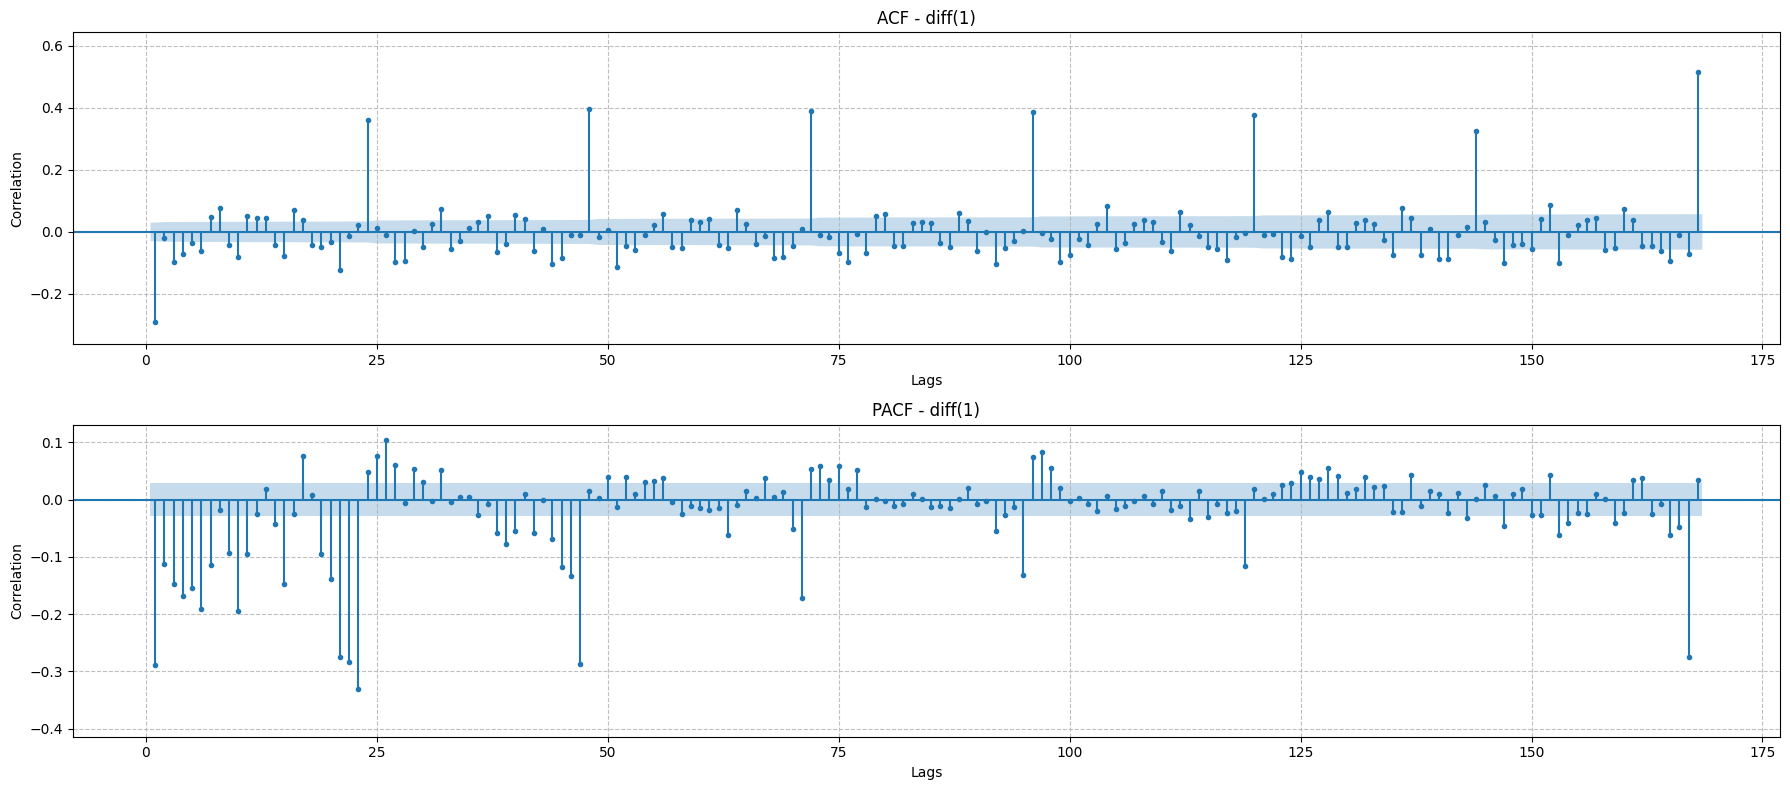

In [30]:
# Displaying the ACF/PACF plots for the stationary data obtained after differencing the original data.
diff_1 = cln_df.diff(1).dropna()
fig, ax = plt.subplots(nrows=2, figsize=(18,8))
plot_acf(ax=ax[0], x=diff_1, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='ACF - diff(1)')
plot_pacf(ax=ax[1], x=diff_1, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='PACF - diff(1)')
for i in range(2):
    ax[i].set_ylabel("Correlation")
    ax[i].set_xlabel("Lags")
    ax[i].grid(linestyle='dashed', alpha=0.8)
plt.tight_layout()

Berdasarkan hasil ACF/PACF plot pada sesi sebelumnya &mdash; dan ditampilkan kembali di atas &mdash;, diketahui bahwa terdapat *seasonality* pada dataset dengan periode harian (24 jam). Jika berfokus pada titik musiman yaitu pada lag-24 dan kelipatannya, terlihat bahwa nilai auto korelasi pada plot ACF tetap bernilai tinggi dan konstan dari lag-24, lag-48, dan seterusnya. Adapun pada plot PACF, terlihat bahwa nilai auto korelasi semakin menurun dari lag-23 menuju lag-47 (23+24) hingga pada lag-119 (23+4x24). Dari hasil tersebut dapat disimpulkan bahwa model *seasonal-Auto Regresive* (SAR) tidak dibutuhkan, karena nilai auto korelasi menurun secara bertahap. Akibat area seasonal pada plot ACF memiliki nilai auto korelasi yang kuat dan konstan, hal ini mengindikasikan komponen seasonal belum stasioner, sehingga harus dilakukan *differencing* orde 1. 

Untuk mengetahui orde **model SMA** yang akan digunakan, maka kita perlu melihat kurva ACF/PACF yang telah di-*differencing* pada area seasonal. Berikut di bawah ini akan ditampilkan plot tersebut.


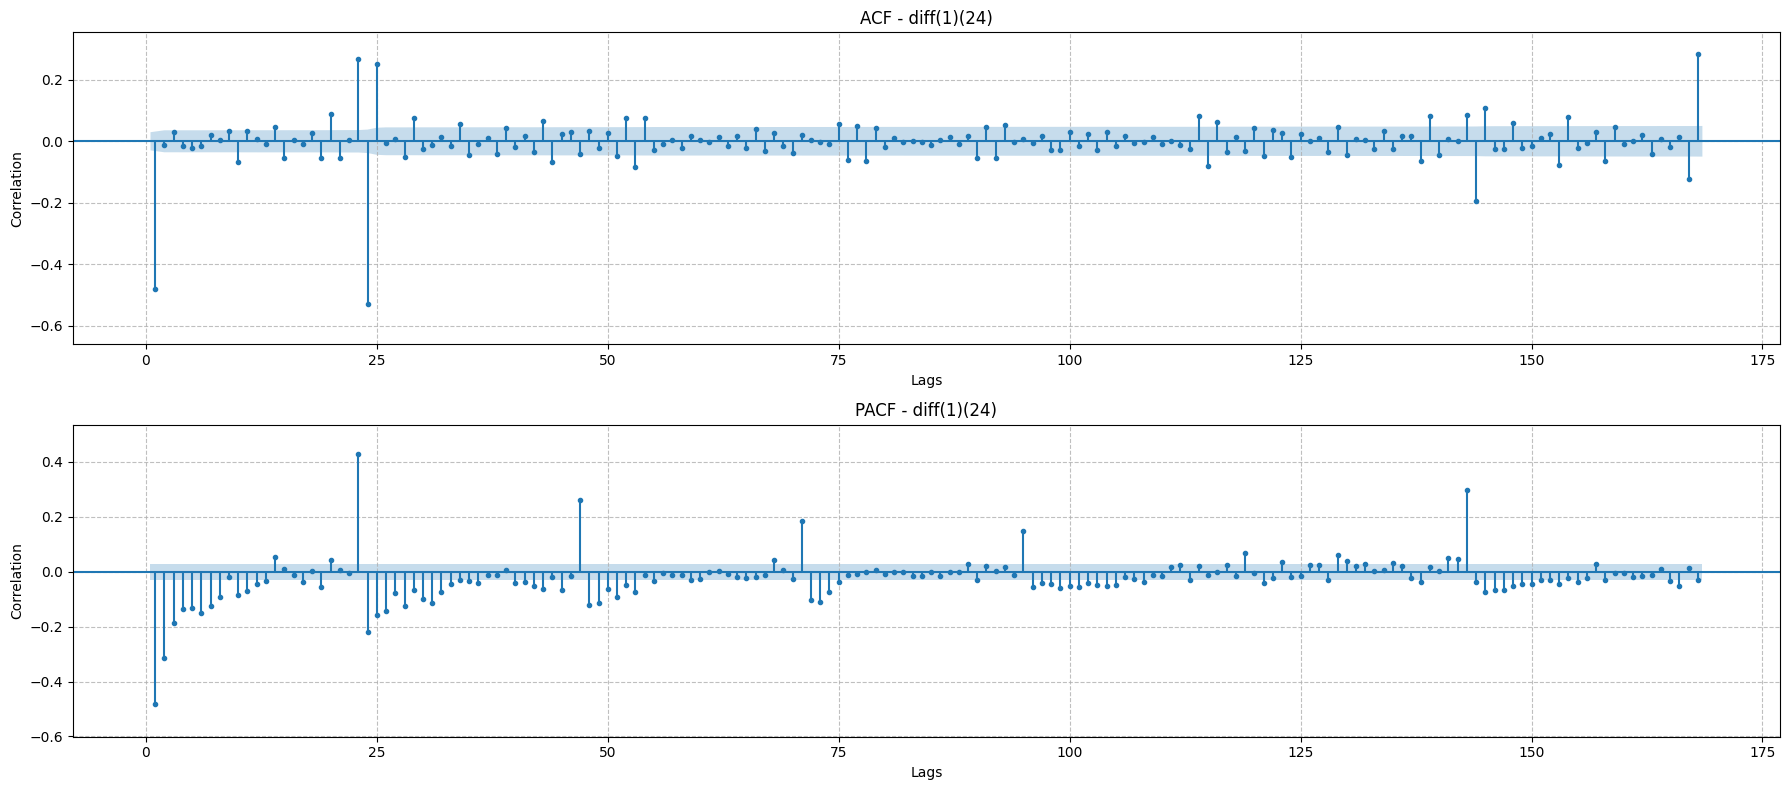

In [31]:
# Displaying the ACF/PACF plots for the stationary seasonal data obtained after differencing the stationary data (original_data.diff(1))
diff_1_24 = cln_df.diff(1).diff(24).dropna()
fig, ax = plt.subplots(nrows=2, figsize=(18,8))
plot_acf(ax=ax[0], x=diff_1_24, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='ACF - diff(1)(24)')
plot_pacf(ax=ax[1], x=diff_1_24, lags=7*24, zero=False, auto_ylims=True, markersize=3, title='PACF - diff(1)(24)')
for i in range(2):
    ax[i].set_ylabel("Correlation")
    ax[i].set_xlabel("Lags")
    ax[i].grid(linestyle='dashed', alpha=0.8)
plt.tight_layout()

Dari visualisasi di atas, terlihat bahwa komponen seasonal (lag-23/24, lag-47/48, lag-71/72, dst.) yang telah di-*differencing* telah berada dalam kondisi stasioner. Komponen seasonal pada plot ACF mengalami drop secara instan sedangkan pada plot PACF, nilai auto korelasi turun secara bertahap. Dari hal ini dapat diputuskan bahwa konfigurasi komponen seasonal, $(P,D,Q,m)$ yang akan digunakan, yaitu $(0, 1, 1, 24)$.

Secara *overall*, konfigurasi $(p,d,q)(P,D,Q,m)$ untuk model ini, yaitu $(0, 1, 1)(0,1,1,24)$. Berikut di bawah ini, kita akan melakukan *rolling forecasting* menggunakan model **SARIMAX** untuk memvalidasi kualitas model.

In [32]:
%%time
# data split
y_train, y_val = train_test_split(cln_df['num_orders'], test_size=0.4, shuffle=False)
y_val, y_test  = train_test_split(y_val, test_size=0.5, shuffle=False)

# training model
model = SARIMAX(endog=y_train, order=(0, 1, 1), seasonal_order=(0,1,1,24))
fit_model = model.fit()

# prediksi training set
y_pred_train = fit_model.predict()

# prediksi validation set
forecast_values = {}
for i in y_val.index:
    forecast_i = fit_model.forecast(i)
    forecast_values[i] = forecast_i.iloc[0]
    fit_model = fit_model.append(y_val[[i]])

y_pred_val = pd.Series(forecast_values)

# rmse score
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)  : {rmse_train:.2f} number of orders")
print(f"RMSE (val)    : {rmse_val:.2f} number of orders")
print(f"{'':=^80}\n")

print(fit_model.summary())

================================== RMSE Score ==================================
RMSE (train)  : 20.25 number of orders
RMSE (val)    : 24.38 number of orders

                                     SARIMAX Results                                      
Dep. Variable:                         num_orders   No. Observations:                 3532
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 24)   Log Likelihood              -15700.706
Date:                            Sat, 20 Jan 2024   AIC                          31407.412
Time:                                    16:10:55   BIC                          31425.900
Sample:                                03-01-2018   HQIC                         31414.010
                                     - 07-26-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Skor RMSE untuk prediksi *training set* dan *validation set* secara berturut-turut adalah 20 dan 24 pesanan taksi/jam. Berdasarkan RMSE-val, model SARIMAX(0, 1, 1)x(0, 1, 1, 24) memberikan hasil error yang lebih kecil dibandingkan model sebelumnya, yaitu OLS Regression, **Random Forest Regressor** dan **XGBoost Regressor**.
* Skor Log Likelihood bernilai cukup rendah, yaitu -15700, dimana model **OLS Regression** memiliki skor sebesar -11429. Semakin tinggi skor Log Likelihood maka semakin baik model dalam melakukan penyesuaian dengan data pelatihan.
* Skor AIC bernilai lebih tinggi dibandingkan model **OLS Regression**, yaitu 31407. Adapun model **OLS Regression** memiliki skor sebesar 22910. Skor AIC yang lebih rendah menunjukkan model yang lebih baik. Skor AIC dapat memberikan  penilaian antara kemampuan model dalam menjelaskan data dan tingkat kekompleksan model, sehingga menghasilkan model yang baik dan tidak *overfitting*. 
* Seluruh fitur, memiliki P-value (P>|z|) kurang dari 5%. Hal ini menunjukkan bahwa seluruh fitur memiliki hubungan yang *significant* dengan target (`'num_orders'`).
* P-value dari Q-test (Ljung-Box) memiliki nilai 0.95 ($\ge$ 5%), yang berarti hipotesis nol diterima. Hipotesis nol tersebut yaitu bahwa residual bersifat independen (*white noise*) untuk setiap lag.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Recommendations</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Untuk meningkatkan performa model, kita perlu menambahkan *exogenous variables* pada model SARIMAX. Fitur yang akan ditambahkan, yaitu sebagai berikut:
    1. Fitur lag-24 dan kelipatannya untuk 7 hari terakhir $(lag-24i, untuk~i=1-7)$.
    2. Fitur hari dalam seminggu (`'dayofweek'`).

</div>

In [33]:
%%time
# data preparation
dataprep_sarimax = DataPreparation()
dataprep_sarimax.fit(timeseries=cln_df,
                     lag=[i*24 for i in range(1,8)],
                     dt_feature=['dayofweek'],
                     orde_diff=0)

sarimax_df = dataprep_sarimax.features_engineering()

# data split
train_df, val_df = train_test_split(sarimax_df, test_size=0.4, shuffle=False)
val_df, test_df  = train_test_split(val_df, test_size=0.5, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_val = val_df.drop('num_orders', axis=1)
y_val = val_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_val[x_val.columns] = scaler.transform(x_val)

# training model
model = SARIMAX(endog=y_train, order=(0, 1, 1), seasonal_order=(0,1,1,24), exog=x_train)
fit_model = model.fit()

# prediksi training set
y_pred_train = fit_model.predict(exog=x_train)

# prediksi validation set
forecast_values = {}
for i in y_val.index:
    forecast_i = fit_model.forecast(i, exog=x_val.loc[i])
    forecast_values[i] = forecast_i.iloc[0]
    fit_model = fit_model.append(y_val[[i]], exog=x_val.loc[[i]])
    
y_pred_val = pd.Series(forecast_values)

# rmse score
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)  : {rmse_train:.2f} number of orders")
print(f"RMSE (val)    : {rmse_val:.2f} number of orders")
print(f"{'':=^80}\n")

print(fit_model.summary())

================================== RMSE Score ==================================
RMSE (train)  : 21.98 number of orders
RMSE (val)    : 23.12 number of orders

                                     SARIMAX Results                                      
Dep. Variable:                         num_orders   No. Observations:                 3398
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 24)   Log Likelihood              -14946.828
Date:                            Sat, 20 Jan 2024   AIC                          29915.657
Time:                                    16:20:32   BIC                          29983.016
Sample:                                03-08-2018   HQIC                         29939.742
                                     - 07-27-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Skor RMSE untuk prediksi *training set* dan *validation set* secara berturut-turut adalah 22 dan 23 pesanan taksi/jam. Berdasarkan RMSE-val, model SARIMAX(0, 1, 1)x(0, 1, 1, 24) dengan *exogenous variables* menghasilkan prediksi yang lebih baik dibandingkan konfigurasi sebelumnya.
* Skor log likelihood meningkat dibandingkan konfigurasi sebelumnya, menjadi -14946.8. Akan tetapi skor tersebut masih lebih rendah dibandingkan skor milik model **OLS Regression**, yaitu sebesar -11429.
* Skor AIC lebih kecil dibandingkan konfigurasi sebelumnya, yaitu menjadi 29915.7. Namun, skor tersebut masih lebih tinggi dibandingkan skor milik model **OLS Regression**, yaitu sebesar 22910.
* Hampir seluruh fitur, memiliki P-value (P>|z|) kurang dari 5%, terkecuali fitur `'lag_168'` dan `'ma.S.L24'`. Hal ini menunjukkan bahwa seluruh fitur memiliki hubungan yang *significant* dengan target (`'num_orders'`).
* P-value dari Q-test (Ljung-Box) memiliki nilai 0.40 ($\ge$ 5%), yang berarti hipotesis nol diterima. Hipotesis nol tersebut yaitu bahwa residual bersifat independen (*white noise*) untuk setiap lag.


</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan pertimbangan skor AIC, log likelihood dan RMSE-val, maka dapat disimpulkan bahwa model SARIMAX (0, 1, 1)x(0, 1, 1, 24) disertai sejumlah *exogenous variables* merupakan model dengan konfigurasi terbaik. Berikut *exogenous variables* yang digunakan:
    1. Fitur lag-24 dan kelipatannya untuk 7 hari terakhir $(lag-24i, untuk~i=1-7)$.
    2. Fitur hari dalam seminggu (`'dayofweek'`).


</div>

## <a id='toc6_3_'></a>[3) *Model Testing*](#toc0_)

Pada bagian sebelumnya, model telah dioptimasi sehingga diperoleh konfigurasi terbaik untuk maisng-masing model. Pada bagian ini, kita akan menguji seberapa baik model bekerja pada *testing set*.

### <a id='toc6_3_1_'></a>[**Ordinary Least Square (OLS) Regression**](#toc0_)

In [34]:
# data preparation
dataprep_ols = DataPreparation()
dataprep_ols.fit(timeseries=cln_df, 
                 lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                 window_size=24, 
                 orde_diff=1)
ols_df = dataprep_ols.features_engineering()

# data split
train_df, test_df = train_test_split(ols_df, test_size=0.2, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

# add constant to X variable
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# training model
model = sm.OLS(y_train, x_train).fit()

# predictions
y_true_train = dataprep_ols.diff_inv_transform(y_train)
y_true_test = dataprep_ols.diff_inv_transform(y_test)
y_pred_train = dataprep_ols.diff_inv_transform(model.predict(x_train))
y_pred_test = dataprep_ols.diff_inv_transform(model.predict(x_test))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)   : {np.sqrt(mean_squared_error(y_true_train, y_pred_train)):.2f} number of orders")
print(f"RMSE (test)    : {np.sqrt(mean_squared_error(y_true_test, y_pred_test)):.2f} number of orders")
print(f"{'':=^80}\n")

================================== RMSE Score ==================================
RMSE (train)   : 21.69 number of orders
RMSE (test)    : 36.10 number of orders



### <a id='toc6_3_2_'></a>[**Random Forest Regressor**](#toc0_)

In [35]:
# data preparation
dataprep_rfr = DataPreparation()
dataprep_rfr.fit(timeseries=cln_df, 
                 lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                 window_size=24, 
                 orde_diff=1)
rfr_df = dataprep_rfr.features_engineering()

# data split
train_df, test_df = train_test_split(rfr_df, test_size=0.2, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

# training model
model = RandomForestRegressor(n_estimators=30, 
                                max_depth=10, 
                                min_samples_split=2, 
                                min_samples_leaf=1,
                                n_jobs=-1,
                                random_state=101010)
model.fit(x_train, y_train)

# predictions
y_true_train = dataprep_rfr.diff_inv_transform(y_train)
y_true_test = dataprep_rfr.diff_inv_transform(y_test)
y_pred_train = dataprep_rfr.diff_inv_transform(pd.Series(model.predict(x_train), index=x_train.index))
y_pred_test = dataprep_rfr.diff_inv_transform(pd.Series(model.predict(x_test), index=x_test.index))

# rmse score
rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)   : {rmse_train:.2f} number of orders")
print(f"RMSE (test)    : {rmse_test:.2f} number of orders")
print(f"{'':=^80}\n")

================================== RMSE Score ==================================
RMSE (train)   : 13.00 number of orders
RMSE (test)    : 40.15 number of orders



### <a id='toc6_3_3_'></a>[**XGBoost Regressor**](#toc0_)

In [36]:
# data preparation
dataprep_xgbr = DataPreparation()
dataprep_xgbr.fit(timeseries=cln_df, 
                 lag=list(range(1,8))+[23+i*24 for i in range(5)]+[i*24 for i in range(1,6)], 
                 window_size=24, 
                 orde_diff=1)
xgbr_df = dataprep_xgbr.features_engineering()

# data split
train_df, test_df = train_test_split(xgbr_df, test_size=0.2, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

# training model
model = XGBRegressor(n_estimators=100,
                     max_depth=3,
                     learning_rate=0.105, 
                     colsample_bytree=0.7,
                     reg_lambda=1,
                     reg_alpha=0,
                     n_jobs=-1,
                     random_state=101010)
model.fit(x_train, y_train)

# predictions
y_true_train = dataprep_xgbr.diff_inv_transform(y_train)
y_true_test = dataprep_xgbr.diff_inv_transform(y_test)
y_pred_train = dataprep_xgbr.diff_inv_transform(pd.Series(model.predict(x_train), index=x_train.index))
y_pred_test = dataprep_xgbr.diff_inv_transform(pd.Series(model.predict(x_test), index=x_test.index))

# rmse score
rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)   : {rmse_train:.2f} number of orders")
print(f"RMSE (test)    : {rmse_test:.2f} number of orders")
print(f"{'':=^80}\n")

================================== RMSE Score ==================================
RMSE (train)   : 18.45 number of orders
RMSE (test)    : 40.15 number of orders



### <a id='toc6_3_4_'></a>[**SARIMAX**](#toc0_)

In [37]:
%%time
# data preparation
dataprep_sarimax = DataPreparation()
dataprep_sarimax.fit(timeseries=cln_df,
                     lag=[i*24 for i in range(1,8)],
                     dt_feature=['dayofweek'],
                     orde_diff=0)

sarimax_df = dataprep_sarimax.features_engineering()

# data split
train_df, test_df = train_test_split(sarimax_df, test_size=0.2, shuffle=False)

# separates features and target
x_train = train_df.drop('num_orders', axis=1)
y_train = train_df['num_orders']
x_test = test_df.drop('num_orders', axis=1)
y_test = test_df['num_orders']

# features scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

# training model
model = SARIMAX(endog=y_train, order=(0, 1, 1), seasonal_order=(0,1,1,24), exog=x_train)
fit_model = model.fit()

# prediksi training set
y_pred_train = fit_model.predict(exog=x_train)

# prediksi testing set
forecast_values = {}
for i in y_test.index:
    forecast_i = fit_model.forecast(i, exog=x_test.loc[i])
    forecast_values[i] = forecast_i.iloc[0]
    fit_model = fit_model.append(y_test[[i]], exog=x_test.loc[[i]])
    
y_pred_test = pd.Series(forecast_values)

# rmse score
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# rmse score
print(f"{' RMSE Score ':=^80}")
print(f"RMSE (train)   : {rmse_train:.2f} number of orders")
print(f"RMSE (test)    : {rmse_test:.2f} number of orders")
print(f"{'':=^80}\n")

d:\~BelajarProg\Python\Bootcamp_Practicum\13_Deret_Waktu_akaTimeSeries\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


================================== RMSE Score ==================================
RMSE (train)   : 22.16 number of orders
RMSE (test)    : 32.02 number of orders

CPU times: total: 12min 45s
Wall time: 12min 23s


### <a id='toc6_3_5_'></a>[**Kesimpulan**](#toc0_)

Dari hasil *model testing* yang telah dilakukan, berikut adalah kesimpulan yang diperoleh:
1. Keseluruhan model dapat memenuhi persyaratan error (RMSE) pada tujuan proyek, dimana persyaratan tersebut yaitu maksimum error (RMSE) sebesar 48 pesanan taksi/jam.

2. Berikut adalah hasil evaluasi error (RMSE) untuk masing-masing model pada saat memprediksi *testing set*:
    * **OLS Regression** : 36.10 pesanan taksi/jam.
    * **Random Forest Regressor** : 40.15 pesanan taksi/jam.
    * **XGBoost Regressor** : 40.15 pesanan taksi/jam.
    * **SARIMAX** : 32.02 pesanan taksi/jam.
3. Saat melakukan pelatihan model dan prediksi *testing set*, model **OLS Regression**, **Random Forest Regressor**, dan **XGBoost Regressor** hanya membutuhkan hitungan detik untuk melakukan kedua hal tersebut. Akan tetapi, model **SARIMAX** membutuhkan waktu yang sangat lama. Pada proyek ini, pelatihan model SARIMAX membutuhkan waktu (*CPU times*) sekitar 12 menit.
4. Dengan mempertimbangkan proses komputasi yang efisien dan hasil prediksi yang akurat, maka model terbaik pada proyek ini yaitu model **OLS Regression**.

# <a id='toc7_'></a>[**G. Kesimpulan**](#toc0_)

Tujuan yang ingin dicapai pada proyek ini adalah menghasilkan model *machine learning* (ML) yang dapat memprediksi jumlah pesanan taksi di bandara dalam 1 jam ke depan secara akurat. Poin penting pada pembangunan model ini yaitu menghasilkan model dengan tingkat error (RMSE) tidak lebih dari 48 pesanan taksi setiap jamnya. Berikut di bawah ini merupakan sejumlah poin-poin penting yang diperoleh selama pelaksanaan proyek dan kesimpulan akhir proyek ini.

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">Key Points</div>
<div style="margin-left:2%; width:95%; text-align:justify">

* Visualisasi data *time series* mengindikasikan data non-stasioner yang terlihat dari data yang memiliki *skewness*. Berdasarkan pengujian statistik, secara signifikan disimpulkan bahwa data *time series* tidak stasioner dan membutuhkan satu kali proses *differencing* agar data bersifat stasioner.
* Ditemukan pola *seasonality* yang sangat kuat pada periode harian (24 jam) dalam data *time series*.
* Jumlah pesanan taksi setiap jam relatif stabil antara bulan Maret hingga Mei. Akan tetapi, pada bulan Juni hingga akhir Agustus, jumlah pesanan taksi mengalami kenaikan tren. Hal tersebut terjadi karena pada rentang bulan Juni-Agustus, bumi belahan utara sedang berada pada musim panas. Musim liburan pada waktu ini mengakibatkan peningkatan aktivitas pariwisata sehingga akan lebih banyak pengunjung di bandara.
* Dibutuhkan lebih banyak taksi yang *standby* di bandara pada pukul 12 malam, 10 pagi dan 4 sore, sedangkan pada jam 6 pagi, 12 siang, dan 6 sore, jumlah taksi yang *standby* di bandara dapat dikurangi. Dan Jumlah taksi yang tersedia di bandara pada hari Senin dan Jum'at harus lebih banyak dari hari biasanya.

</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">Conclusions</div>
<div style="margin-left:2%; width:95%; text-align:justify">

1. Keseluruhan model dapat memenuhi persyaratan error (RMSE) pada tujuan proyek, dimana persyaratan tersebut yaitu maksimum error (RMSE) sebesar 48 pesanan taksi/jam.

2. Berikut adalah hasil evaluasi error (RMSE) untuk masing-masing model pada saat memprediksi *testing set*:
    * **OLS Regression** : 36.10 pesanan taksi/jam.
    * **Random Forest Regressor** : 40.15 pesanan taksi/jam.
    * **XGBoost Regressor** : 40.15 pesanan taksi/jam.
    * **SARIMAX** : 32.02 pesanan taksi/jam.
3. Saat melakukan pelatihan model dan prediksi *testing set*, model **OLS Regression**, **Random Forest Regressor**, dan **XGBoost Regressor** hanya membutuhkan hitungan detik untuk melakukan kedua hal tersebut. Akan tetapi, model **SARIMAX** membutuhkan waktu yang sangat lama. Pada proyek ini, pelatihan model SARIMAX membutuhkan waktu (*CPU times*) sekitar 12 menit.
4. Dengan mempertimbangkan proses komputasi yang efisien dan hasil prediksi yang akurat, maka model terbaik pada proyek ini yaitu model **OLS Regression**.

</div>